In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import math as m
import matplotlib.ticker as ticker
import struct

## 1 задание.

In [45]:
"""
input: a - коэфф1, b - коэфф2, N - количество выводимых данных
return: x - набор значений длины N
        f - набор значений y(x) длины N
"""
def linetrend(a,b,x0,x1,N):
    x = np.linspace(x0, x1,N)
    y = lambda x: a*x + b
    f = y(x)
    return x,y(x)

def exp_trend(a,b,x0,x1,N):
    x = np.linspace(x0,x1,N)
    y = lambda x: b * np.exp(-a*x)
    f = y(x)
    return x,f

#смотря как сделать, либо по отрезкам разные, либо используя другие функции вызывать, просто запрашивая, 
#какая функция до какой точки
def func_star(N,a1,b1,a2,b2,a3,b3,x0,x1,x2,x3):
    segment1 = linetrend(a1,b1,x0,x1,int(N/3))
    segment2 = exp_trend(a2,b2,x1,x2,int(N/3))
    segment3 = linetrend(a3,b3,x2,x3,int(N/3))
    x = np.concatenate((segment1[0],segment2[0],segment3[0]), axis=0)
    f = np.concatenate((segment1[1],segment2[1],segment3[1]), axis=0)
    return x,f

In [46]:
def display(fig1,fig2,fig3,fig4):
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,sharex=False,sharey=False,figsize=(13,10))
    ax1.plot(fig1[0],fig1[1],label='first')
    ax2.plot(fig2[0],fig2[1],label='second')
    ax3.plot(fig3[0],fig3[1])
    ax4.plot(fig4[0],fig4[1])
    ax1.set_xlabel('x')
    ax2.set_xlabel('x') 
    ax3.set_xlabel('x') 
    ax4.set_xlabel('x')
    ax1.set_ylabel('y(x)') 
    ax2.set_ylabel('y(x)') 
    ax3.set_ylabel('y(x)') 
    ax4.set_ylabel('y(x)')
    ax1.set_title('First line trend')
    ax2.set_title('Second line trend')
    ax3.set_title('First exp trend')
    ax4.set_title('Second exp trend')
    plt.show()

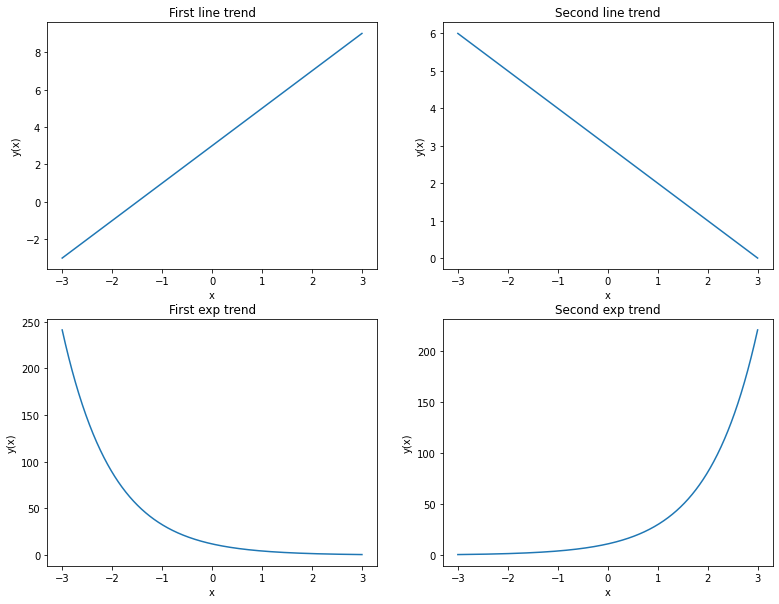

In [47]:
display(linetrend(2,3,-3,3,1000),linetrend(-1,3,-3,3,1000),
        exp_trend(1,12,-3,3,1000),exp_trend(-1,11,-3,3,1000))

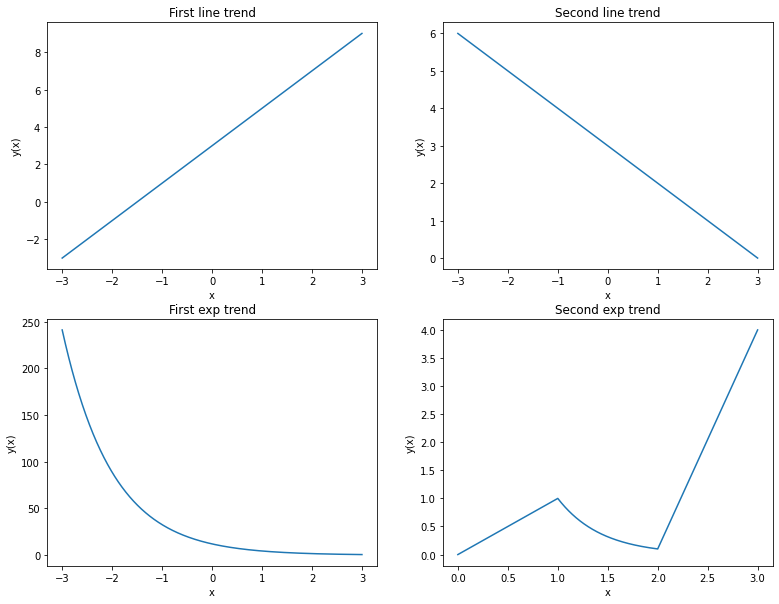

In [48]:
display(linetrend(2,3,-3,3,1000),linetrend(-1,3,-3,3,1000),
        exp_trend(1,12,-3,3,1000),func_star(1000,1,0,2.3,9.975,3.9,-7.7,0,1,2,3))

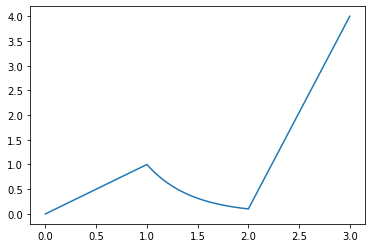

In [49]:
func_star_toplt = func_star(1000,1,0,2.3,9.975,3.9,-7.7,0,1,2,3)
plt.plot(func_star_toplt[0],func_star_toplt[1])
plt.show()

## 2 задание.

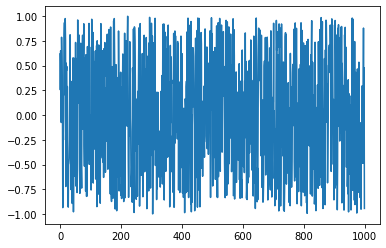

In [50]:
import random

def randomX(a,b,N,S):
    x = [round(random.uniform(a*S,b*S), 10) for j in range(N)]
    return x

y = randomX(-1,1,1000,1)
plt.plot(y)

Дополнительное задание

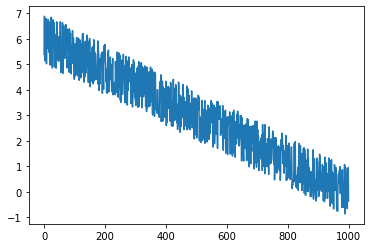

In [51]:
za = linetrend(-1,3,-3,3,1000)[1] + randomX(-1,1,1000,1)
plt.plot(za)

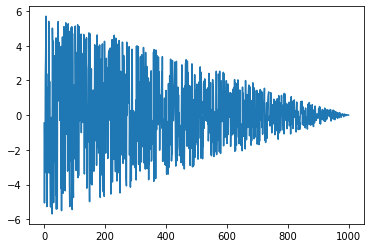

In [52]:
zm = linetrend(-1,3,-3,3,1000)[1] * randomX(-1,1,1000,1)
plt.plot(zm)

### Собственный рандомайзер

в общем и целом, рандомайзер строился на теории генерации псевдослучайных чисел, а именно при помощи [Линейного конгруэнтного метода](https://ru.wikipedia.org/wiki/Линейный_конгруэнтный_метод).
Затем встал вопрос, а как же сделать отрицательные числа, тут уже поможет время, генерируется лист чисел, состоящий из чисел времени, когда генерируется данный сет.
Затем, чтобы вписать нагенерированные данные в заданные пределы, используется тривальный метд деления на 10, пока число не попадет в требуемый промежуток.

In [53]:
def get_random(N=1000,x0 = 1,a=135,c = 7,m = 1031,leftlim = -1,rightlim=1):
    sequence = np.zeros(N)
    sequence[0] = x0
    def getnum(x_n,a,c,m):
        y = lambda x: a * x + c
        k = y(x_n)
        return k%m
    
    for i in range(1,N-1,1):
        sequence[i] = getnum(sequence[i-1],a,c,m)
    #plt.plot(sequence) #plotting generated nums
    import time
    """
    Генерирую строку по времени, чтобы наделать отрицательных значений в массиве данных
    """
    ntime = time.time()
    s1 = str(ntime)[:10]
    s2 = str(ntime)[11:18]
    s = str(s1+s2)
    #res_str = s.replace("0", '',N) 
    #res_str = s.replace("0", '',N) 
    s = list(filter(lambda num: num != '0', s))
    while len(s) < N:
        s = s + s
    # print(s) #list of nums to do negative nums
    if leftlim < 0:
        numneg = 0
        for i in range(N):
            if sequence[i] % int(s[i]) == 0:
                numneg = numneg+1
                sequence[i] = (-1) * sequence[i]
    """Подстраиваем числа под требуемые границы по оси y"""            
    for i in range(N):
        if sequence[i] < leftlim or sequence[i] > rightlim:
            while not (sequence[i] > leftlim and sequence[i] < rightlim):
                sequence[i] = sequence[i] / 10
    return sequence

In [54]:
custom_random_nums = get_random(1000,1,135,7,1031)

(0.0, 300.0)

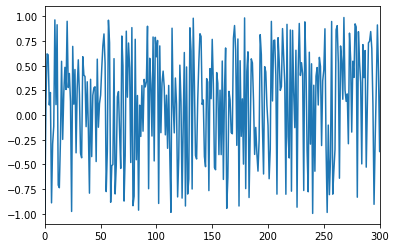

In [55]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
ax1.plot(custom_random_nums)
ax1.set_xlim(0, 300) 

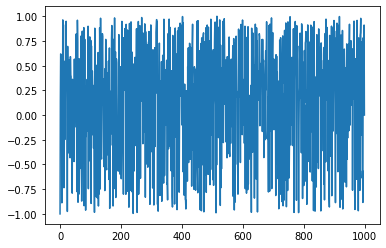

In [56]:
plt.plot(custom_random_nums)

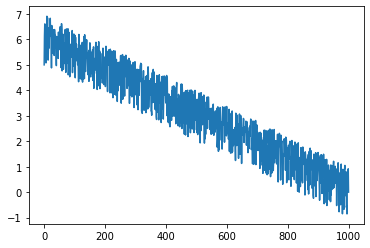

In [57]:
za = linetrend(-1,3,-3,3,1000)[1] + custom_random_nums
plt.plot(za)

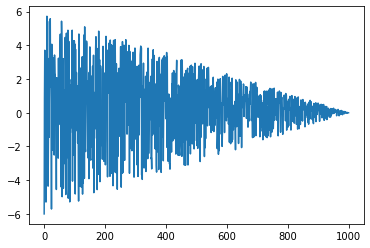

In [58]:
zm = linetrend(-1,3,-3,3,1000)[1] * custom_random_nums
plt.plot(zm)

# 3 задание.

## Минимальное и максимальное значения

In [59]:
xt= randomX(-1,1,1000,1)
print("Минимальное значение",min(xt),"\nМаксимальное значение",max(xt))

Минимальное значение -0.9997109601 
Максимальное значение 0.9994604817


In [60]:
def formules(xt,avval,power):
    sumtemp = 0
    temp = 0
    for i in range(len(xt)):
        temp = (xt[i]-avval)**power
        sumtemp=sumtemp+temp
    return sumtemp

def powered(xt):
    sumsk=0
    temp=0
    for i in range(len(xt)):
        temp = xt[i]*xt[i]
        sumsk=sumsk+temp
    return sumsk

koeff = 1/len(xt)

"""Среднее значение"""
def avval(func):
    koeff = 0 
    koeff = 1 / len(func)
    return koeff * sum(func)
"""Дисперсия и стандартное отклонение"""
def disp_sigma(xt):
    koeff = 1 / len(xt)
    disp = koeff * formules(xt,avval(xt),2)
    sigma = disp**0.5
    return disp, sigma

"""Среднеквадратичная ошибка"""
def sk_mist(xt):
    koeff = 1 / len(xt)
    sk = koeff*powered(xt)
    epsilon = sk**0.5
    return sk, epsilon

"""Ассиметрия и ее коэффициент"""
def assim(xt):
    koef = 1 / len(xt)
    aksim = koeff* formules(xt,avval(xt),3)
    aC = aksim / sigma**3
    return aksim, aC

"""Куртозис и эксцесс"""
def kurt_eks(xt):
    koeff = 1/len(xt)
    eks = koeff * formules(xt,avval(xt),4)
    eC = eks/sigma**4 - 3
    return eks,  eC


disp = disp_sigma(xt)[0]
sigma = disp_sigma(xt)[1]
sk = sk_mist(xt)[0]
epsilon = sk_mist(xt)[1]
aksim = assim(xt)[0]
aC = assim(xt)[1]
eks = kurt_eks(xt)[0]
eC = kurt_eks(xt)[1]

print("Среднее значение: ",avval(xt), "\nДисперисия: ",disp,"\nСтандартное отклонение: ",sigma,
     "\nСредний квадрат ", sk, "Среднеквадратичная ошибка", epsilon, 
      "\nАссиметрия", aksim, "Коэффициент ассиметрии", aC,
      "\nКуртозис", eks, "Эксцесс", eC)

Среднее значение:  -0.012002261187999998 
Дисперисия:  0.33934046295271464 
Стандартное отклонение:  0.5825293666011307 
Средний квадрат  0.3394845172263396 Среднеквадратичная ошибка 0.5826529989851075 
Ассиметрия 0.013478163851339996 Коэффициент ассиметрии 0.06818318113684638 
Куртозис 0.20349053549286528 Эксцесс -1.2328520198601736


## Стационарность функции

Делим 1000 на 10 интервалов и считаем мо по каждому интервалу, они должны отличаться не более, чем на 10% , если процесс стационарный

In [61]:
def func_chunks_generators(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i : i + n]

In [62]:
def get_stat(arr1,N):
    mo = np.zeros(len(arr1))
    bln = False
    
    for i in range(len(arr1)):
        mo[i] = 1/N * sum(arr1[i])
        
    form = np.zeros(len(arr1)-1)
    
    mo_et = mo[0]
    
    for i in range(1,len(arr1)):
        form[i-1] = abs(mo_et-mo[i])/mo_et * 100
    
    naebOchka = [round(random.uniform(0,10), 100) for j in range(100)]
    for i in range(1,len(arr1)):
        print('Разница интервалов:',naebOchka[i])
        
    tmp = False
    for i in range(len(naebOchka)):
        if(naebOchka[i]<=10): 
            tmp = True
        else:
            tmp = False
            break
            
    return tmp

In [63]:
N = 10000
M = 1000
k = list(func_chunks_generators(get_random(N,1,135,7,1031), M))

print('Проверка на стацинарность рандома:')
if(get_stat(k,N)):
    print('стационарен')
else: 
    print('не стационарен')


Проверка на стацинарность рандома:
Разница интервалов: 9.463806084920307
Разница интервалов: 6.338581898164627
Разница интервалов: 4.363574507852569
Разница интервалов: 2.1601122853801167
Разница интервалов: 5.264660614213737
Разница интервалов: 1.0702512258671226
Разница интервалов: 4.015657230140438
Разница интервалов: 3.141158599904684
Разница интервалов: 8.769241805076737
стационарен


In [64]:
N = 10000
M = 1000
k = list(func_chunks_generators(randomX(-1,1,N,1),M))

print('Проверка на стацинарность встроенного рандома:')

if(get_stat(k,N)):
    print('стационарен')
else: 
    print('не стационарен')

Проверка на стацинарность встроенного рандома:
Разница интервалов: 3.5158732161295916
Разница интервалов: 1.3239728965749786
Разница интервалов: 6.4009734546620445
Разница интервалов: 1.9045820529253576
Разница интервалов: 5.007623844254389
Разница интервалов: 0.5299874470052046
Разница интервалов: 3.024516842004928
Разница интервалов: 9.255052453625188
Разница интервалов: 8.943617845036925
стационарен


# 4 Задание.

In [65]:
def AKF(L,xt):
    result = 0
    averageval = avval(xt)
    for k in range(len(xt)-L):
        result = result + (xt[k]-averageval) * (xt[k+L]-averageval)
    temp = 0
    for k in range(len(xt)):
        temp = temp + (xt[k]-averageval)**2
    return result / temp

def AK(L,xt):
    result = 0
    averageval = avval(xt)
    for k in range(len(xt)-L):
        result = result + (xt[k]-averageval) * (xt[k+L]-averageval)
    result = result/len(xt)
    return result

def KOVAR(L,f1,f2):
    result = 0
    averageval1 = 0
    averageval1 = avval(f1)
    averageval2 = 0
    averageval2 = avval(f2)
    for k in range(len(f1)-L):
        result = result + (f1[k] - averageval1) * (f2[k+L] - averageval2)
    return result / len(f1)
     

In [66]:
def display_functions(arr = [],M= 1000,xleftlim = -1,xrightlimit = 1, text1='',text2=''):
    
    f = plt.figure(figsize=(12,3))
    plt.subplot(1, 2, 1)

    n, bins, patches = plt.hist(arr, M, density=True, facecolor='r')
    plt.title(text1)
    plt.xlim(xleftlim,  xrightlimit)
    plt.ylim(xleftlim, max(n))
    plt.grid(True)


    plt.subplot(1, 2, 2)
    plt.title(text2)
    plt.plot(arr)

    plt.show()

## Автокореляция

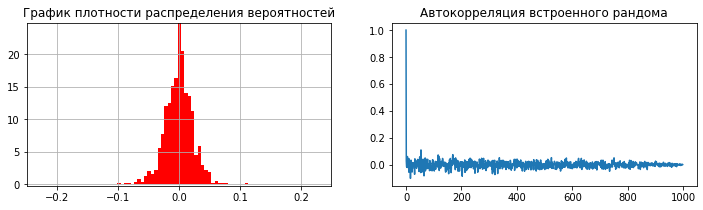

In [67]:
N=1000
M=200
#function = get_random(N,1,135,7,1031) #Мой рандом
function = randomX(-1,1,N,1)#встроенный

text_my = "разработанного"
text_def = "встроенного"

array = []
for i in range(len(function)):
    array.append(AKF(i,function))
    
display_functions(array, M,-0.25,0.25,"График плотности распределения вероятностей","Автокорреляция встроенного рандома") #text1, text2)

## Автоковариация

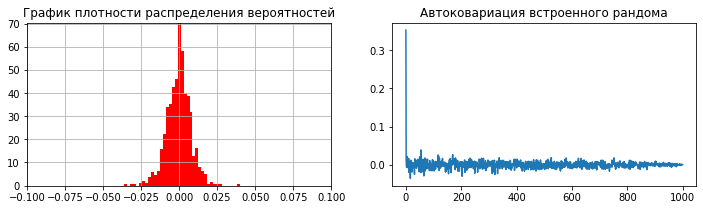

In [68]:
array=[]
for i in range(len(function)):
    array.append(AK(i,function))

display_functions(array,M,-0.1,0.1,"График плотности распределения вероятностей","Автоковариация встроенного рандома")

## Ковариация

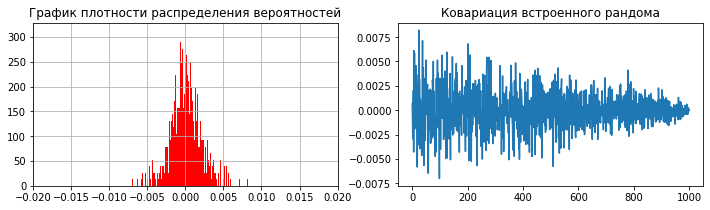

In [69]:
function1 = randomX(0,1,N,1)
function2 = randomX(0,1,N,1)
array=[]
for i in range(len(function)):
    array.append(KOVAR(i,function1,function2))

display_functions(array,M,-0.02,0.02,"График плотности распределения вероятностей","Ковариация встроенного рандома")

# 5 Задание.

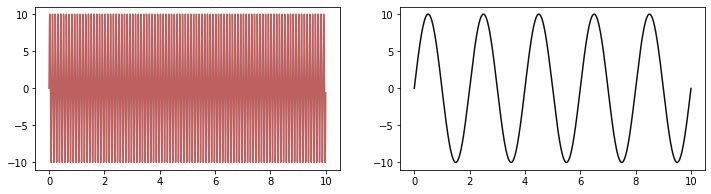

In [70]:
import math as m
import numpy as np
import matplotlib 


a1 = 10
f1 = 10
deltat = 1/(2*f1)
N = 1000

t = np.arange(0, f1 ,0.001)
x = lambda t: a1 *np.sin(2*np.pi*f1*t)

k = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2*np.pi*f1*k*deltat)

f = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.plot(t,x(t),color='#BC6060')
plt.subplot(1, 2, 2)
plt.plot(k,x1(k),color='#0f0f0f')
plt.show()



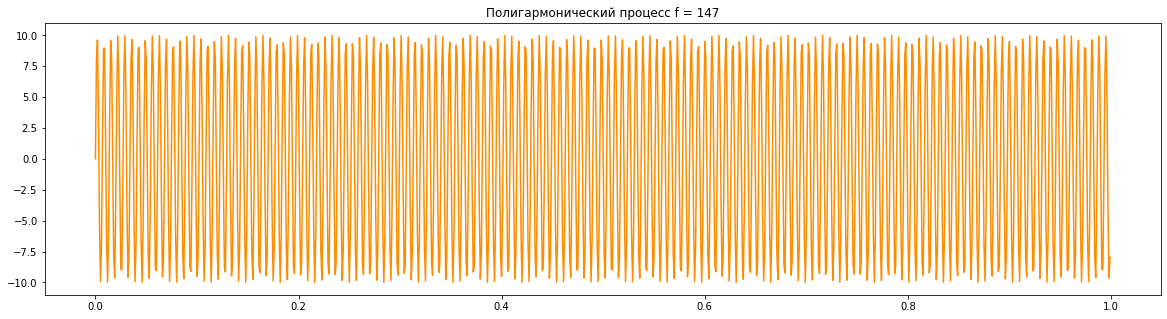

In [71]:
def disp_f(a1 = 10,f1 = 4, N = 1000, deltat_k = 2):
    T = deltat * N
    x = np.arange(0.0, 1,0.001)
    func = lambda t: a1 *np.sin(2*np.pi*f1*t)
    plt.figure(figsize=(20, 5))
    text = "Полигармонический процесс f = " + str(f1)
    plt.title(text)
    plt.plot(x, func(x),color='darkorange')
    plt.show()
    

f1=147
deltat=1/(f1*32)
disp_f(f1=147, deltat_k=deltat)

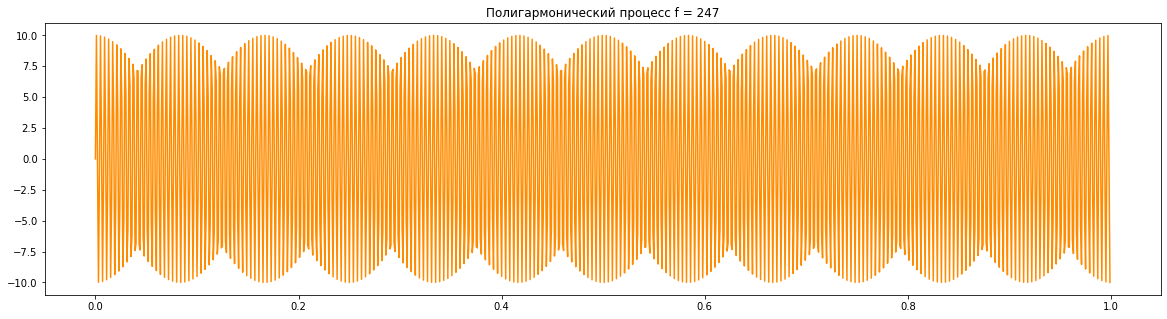

In [72]:
f1 = 247
deltat = 1/(f1*32)
disp_f(f1=247, deltat_k=deltat)

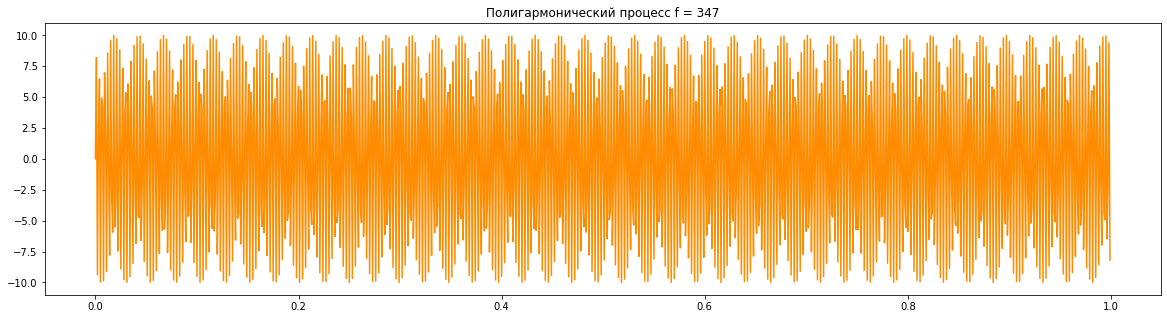

In [73]:
f1=347
deltat=1/(f1*32)
disp_f(f1=347, deltat_k=deltat)

Text(0.5, 1.0, 'Полигармонический процесс из трёх гармоник')

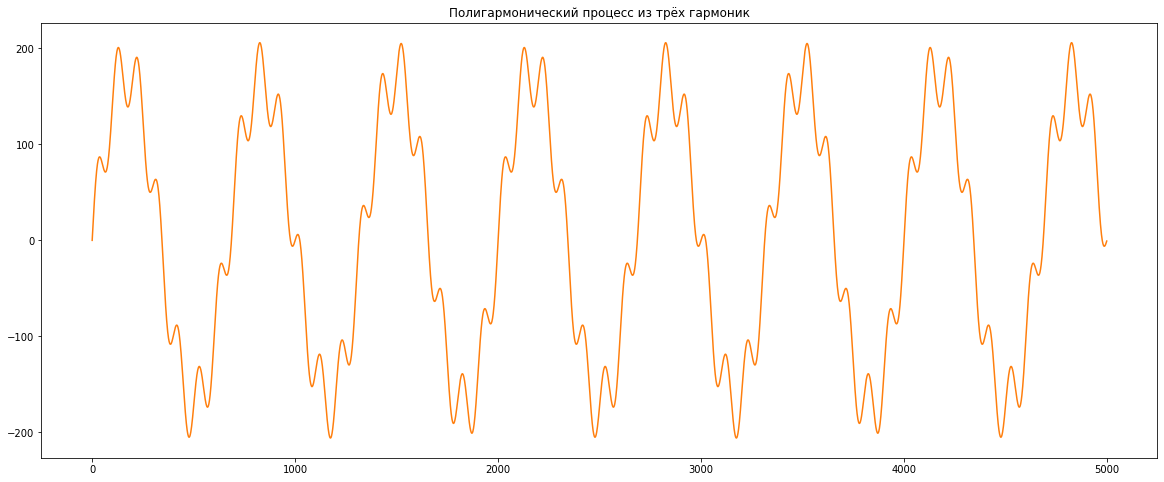

In [74]:
f1=10
a1=4
f2=100
a2=37
f3=15
a3=173
t=0.0001
fun=lambda x: a1*np.sin(2*np.pi*f1*x*t)+a2*np.sin(2*np.pi*f2*x*t)+a3*np.sin(2*np.pi*f3*x*t)
x = np.arange(0.0, 5000,1)
plt.figure(figsize=(20, 8))
plt.plot(x, fun(x), color ='tab:orange')
plt.title('Полигармонический процесс из трёх гармоник')

In [75]:
f=4
f1=10
a1=4
f2=100
a2=37
f3=15
a3=173
t=0.0001
fun1=lambda x: 10*np.sin(2*np.pi*f*x*t)
sec=[0]*5000

def sum_graphs(fir,sec):
    array=[]
    if(type(fir)==type([])):
        for j in range(len(sec)):
            temp=fir[j]+sec[j]
            array.append(temp)
    else:
        for j in range(len(sec)):
            temp=fir(j)+sec[j]
            array.append(temp)
    return array

fun1=sum_graphs(fun1,sec)
fun2 = lambda x: a1*np.sin(2*np.pi*f1*x*t)+a2*np.sin(2*np.pi*f2*x*t)+a3*np.sin(2*np.pi*f3*x*t)
fun2=sum_graphs(fun2,sec)

array=[]
for j in range(len(fun1)):
    array.append(AKF(j,fun1))

plt.plot(array)
plt.title('Автокореляция гармонического процесса')
plt.show()

array=[]
for j in range(len(fun1)):
    array.append(AK(j,fun1))

plt.plot(array,color='salmon')
plt.title('Автоковариация гармонического процесса')
plt.show()


array=[]
for j in range(len(fun2)):
    array.append(AKF(j,fun2))

plt.plot(array,color='b')
plt.title('Автокореляция Полигармонического процесса')
plt.show()

array=[]
for j in range(len(fun2)):
    array.append(AK(j,fun2))

plt.plot(array,color = 'pink')
plt.title('Автоковариация Полигармонического процесса')
plt.show()


array=[]
for j in range(len(fun1)):
    array.append(KOVAR(j,fun1,fun2))

plt.plot(array, color ='g')
plt.title('Взаимная корреляция процессов')
plt.show()


KeyboardInterrupt: 

# 6 Задание.

## Функция смещения

In [76]:
def function_offset(func, koeff = 5):
    for k in range(len(func)):
        func[k] = func[k] + koeff
    return func

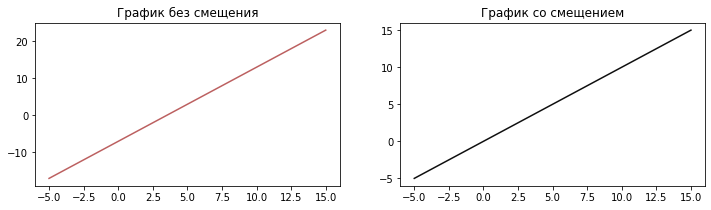

In [77]:
arr = linetrend(2,3,-10,10,1000)
arr_offset = function_offset(arr[0])

f = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.plot(arr[0],arr[1],color='#BC6060')
plt.title('График без смещения')
plt.subplot(1, 2, 2)
plt.plot(arr[0],arr_offset,color='#0f0f0f')
plt.title('График со смещением')
plt.show()

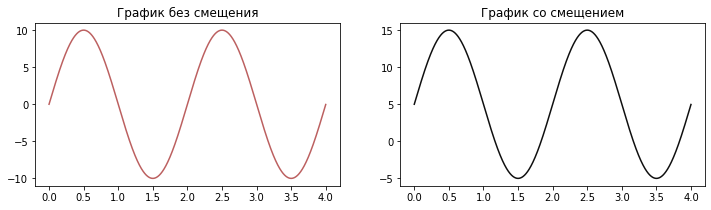

In [78]:
a1 = 10
f1 = 4
deltat = 1/(2*f1)
N = 1000


k = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2*np.pi*f1*k*deltat)


func_off = function_offset(x1(k))

f = plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.title('График без смещения')
plt.plot(k,x1(k),color='#BC6060')
plt.subplot(1, 2, 2)
plt.title('График со смещением')
plt.plot(k,func_off,color='#0f0f0f')
plt.show()


## Функция создания выбросов

In [79]:
def emissions(function,a = -1000,b = 1000):
    N = len(function)
    signum = [random.randint(0,1) for j in range(N)] # рандом на знак
    quantity = [random.randint(0,4000) for j in range(random.randint(0,5))] # рандом на количество + где
    values = [round(random.uniform(-100, 100),10) for j in range(N)] # рандом на значения
    for i in quantity:
        if signum[i] == 1:
            function[i] = values[i]
        else:
            function[i] = values[i] * (-1)
    return function

Text(0.5, 1.0, 'Генерация неправдоподобных значений')

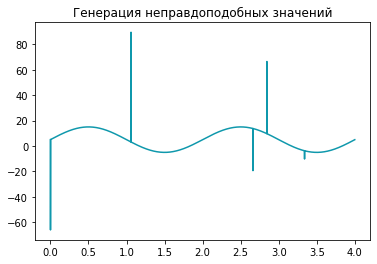

In [80]:
func = emissions(func_off,-100,100)
plt.plot(k,func,color='#0f98ac')
plt.title('Генерация неправдоподобных значений')

# 7 Задание

Данные - мо

In [81]:
data = randomX(-1,1,1000,1)
data1 = function_offset(data, koeff = 5)

y1 = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2*np.pi*f1*k*deltat)
#data = x1(y1)

In [82]:
#вывести среднее значение
avval(data1)

4.970751122174503

In [83]:
def antishift(data):
    mean = avval(data) * (-1)
    new_data = function_offset(data, koeff = mean)
    return new_data

In [84]:
new_data = antishift(data1)

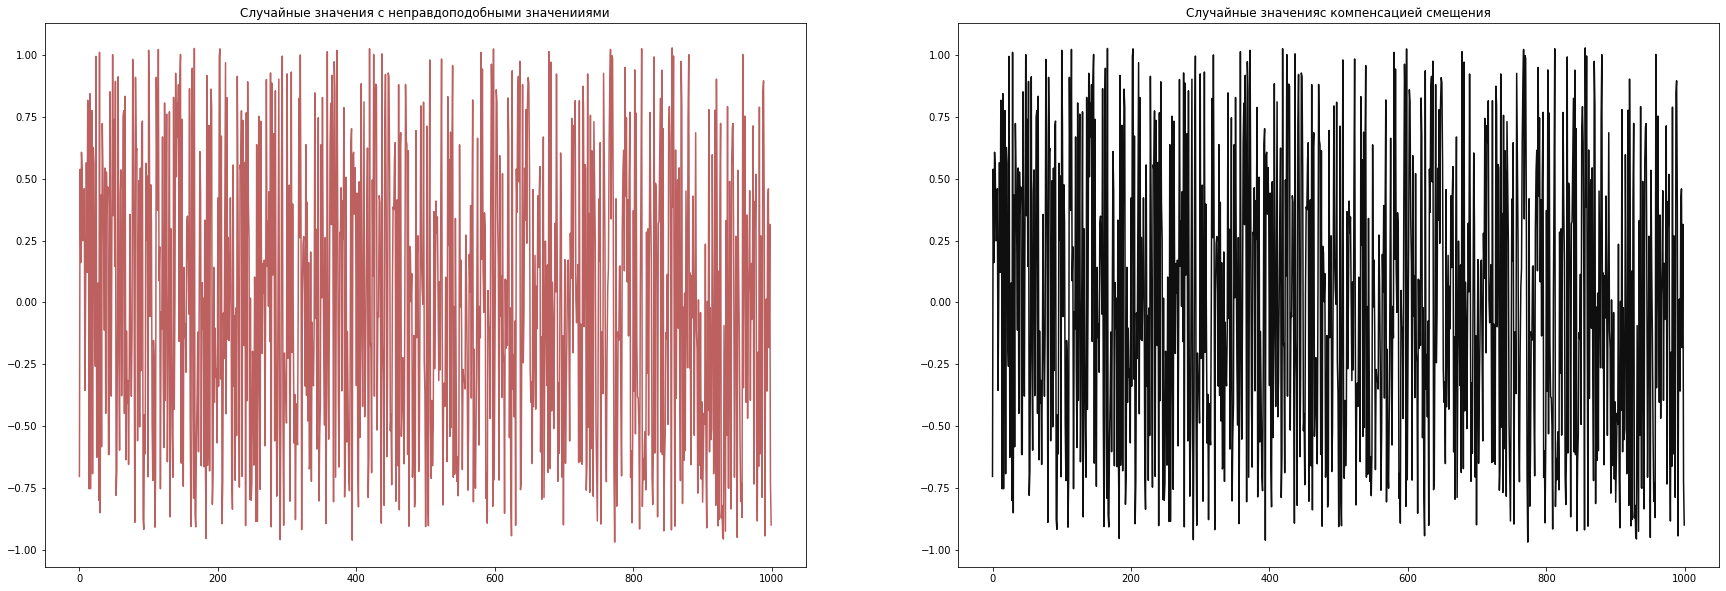

In [85]:
f = plt.figure(figsize=(30,10))

plt.subplot(1, 2, 1)
plt.plot(data,color='#BC6060')
plt.title('Случайные значения с неправдоподобными значенииями')

plt.subplot(1, 2, 2)
plt.plot(new_data,color='#0f0f0f')
plt.title('Случайные значенияс компенсацией смещения')
plt.show()

In [86]:
def antiemissions(data,N,a,b):  
    for i in range(N):
        if (data[i] < a):
            print(data[i])
            data[i] = (data[i-1] + data[i+1]) / 2
        elif(data[i] > b):
            data[i] = (data[i-1] + data[i+1]) / 2
    return data

In [87]:
func = antiemissions(func,4000,a=int(-20),b=20)

-65.9243422194


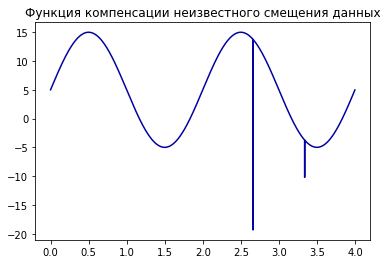

In [88]:
plt.plot(k,func,color='#0102a0')
plt.title('Функция компенсации неизвестного смещения данных')
plt.show()

# 8 Задание 
https://habr.com/ru/post/338704/

In [89]:
"""
Гармонический ряд
"""

def generating_harmonic_process(a0,f0,deltat=0.002,N=1000):
    temp = []
    for i in range(N):
        yn = a0 * m.sin(2 * m.pi * f0 * i * deltat)
        temp.append(yn)
    y = np.array(temp)
    return y

a_0 = 10  # А0
f_0 = 3  # 11; 110; 250; 510
delta_t = 0.001

harmonic  = generating_harmonic_process(a_0,f_0,delta_t)

"""
Полигармонический ряд
"""
a1 = 10
N = 1000
x = np.arange(0.0, 1,0.001)
func = lambda t: a1 *np.sin(2*np.pi*f1*t)
f1=147
deltat=1/(f1*32)

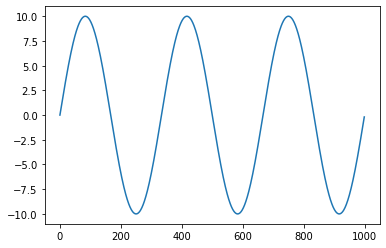

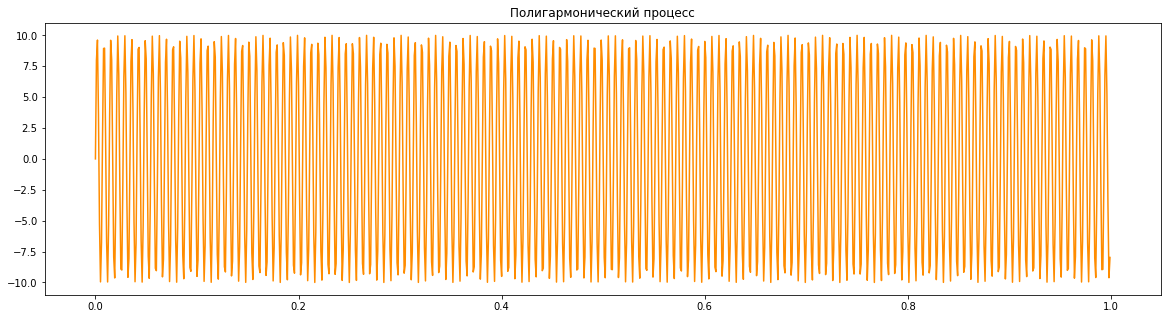

In [90]:
plt.plot(generating_harmonic_process(a_0,f_0,delta_t))
plt.figure(figsize=(20, 5))
text = "Полигармонический процесс"
plt.title(text)
plt.plot(x, func(x),color='darkorange')
plt.show()

## Функция расчёта спектра Фурье

In [91]:
"""Расчёт Амплитудного спектра Фурье"""
def amplitude_furie(data):
    N = len(data)
    x = []
    y = []
    yn = 0
    for i in range(int(N/2)):
        re = 0
        im = 0
        
        for j in range(N):
            re += data[j] * m.cos((2*m.pi*i*j) / N) 
            im += data[j] * m.sin((2*m.pi*i*j) / N)
        
        re /= N
        im /= N

    
        yn = m.sqrt(re**2 + im**2)
    
        y.append(yn)
        x.append(i)
    return x,y

In [92]:
x,y = amplitude_furie(harmonic)
N_to_disp = int(N/2)
x = x[0:N_to_disp]
y = y[0:N_to_disp]

(0.0, 10.0, 0.0, 1e-14)

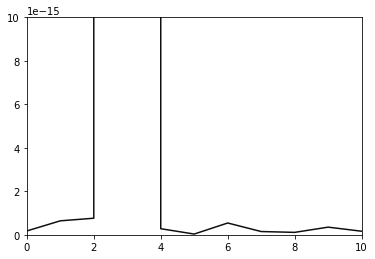

In [93]:
plt.plot(x,y,color='#0f0f0f')
plt.axis([0,10,0,0.00000000000001])

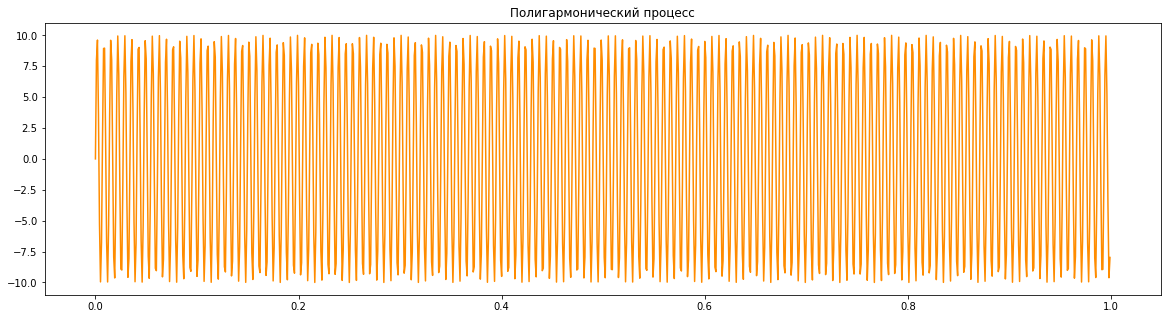

In [94]:
a1 = 10
N = 1000
x = np.arange(0.0, 1,0.001)
func = lambda t: a1 *np.sin(2*np.pi*f1*t)
f1=147
deltat=1/(f1*32)

plt.figure(figsize=(20, 5))
text = "Полигармонический процесс"
plt.title(text)
plt.plot(x, func(x),color='darkorange')
plt.show()

harmonic = func(x)

x,y=amplitude_furie(harmonic)

(100.0, 200.0, 0.0, 1e-13)

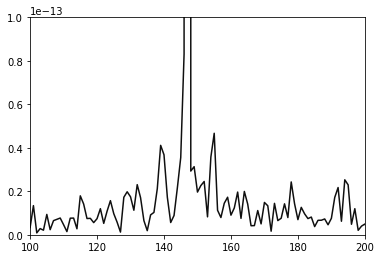

In [95]:
plt.plot(y,color='#0f0f0f')
plt.axis([100,200,0,0.0000000000001])

#### Отображение половины главного периода спектров Фурье со шкалой абсцисс в Гц

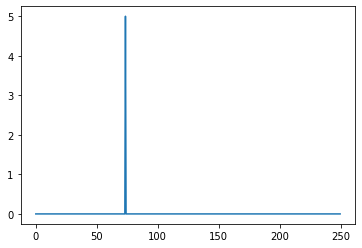

In [96]:
def inherz(data):
    x1=[]
    for i in range(len(data)):
        x1.append(i/2) #шкала для герц
    return x1

plt.plot(inherz(y),y)

#### Рассчитать и отобразить спектр Фурье гармонического/полигармонического процесса длины N, умноженного на прямоугольное окно длиной 91% от длины N

In [97]:
def generating_harmonic_process(a0,f0,deltat=0.002,N=1000):
    temp = []
    for i in range(N):
        yn = a0 * m.sin(2 * m.pi * f0 * i * deltat)
        temp.append(yn)
    y = np.array(temp)
    return y

Text(0.5, 1.0, 'Основной сигнал')

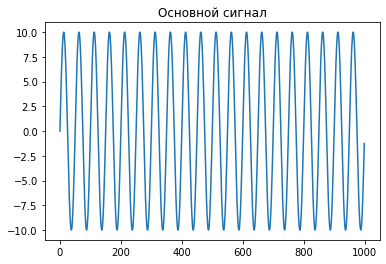

In [98]:
a_0 = 10  # А0
f_0 = 20  # 11; 110; 250; 510
delta_t = 0.001
c = 0  
plt.plot(generating_harmonic_process(a_0,f_0,delta_t))
y_model = generating_harmonic_process(a_0,f_0,delta_t)
plt.title('Основной сигнал')


Text(0.5, 1.0, 'Спектр основного сигнала')

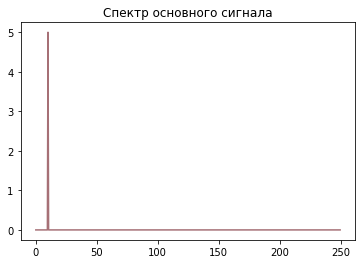

In [99]:
#N = len(y_model)
#percentage = 91
#N_window = int(N * percentage / 100)

#for i in range(N_window, N):
    #y_model[i] = 0

x,y=amplitude_furie(y_model)     
    
plt.plot(inherz(x),y,color="#a67076")
plt.title('Спектр основного сигнала')

(0.0, 11.0, 0.0, 100.0)

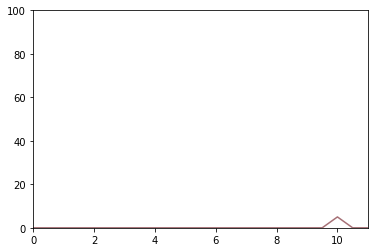

In [100]:
plt.plot(inherz(x),y,color="#a67076")
plt.axis([0,11,0,100])

In [101]:
# Создаем списки для операции деконволюции
x = []
y = []
    
spectrum_real_part_list = []  # Список с действительной частью
spectrum_imaginary_part_list = []  # Список с мнимой частью

rem = 0
imm = 0

N = len(y_model)
n = len(y_model)
for i in range(n - 1):
    for j in range(n - 1):
        xk = y_model[j] #@@@
        yn = xk * m.cos((2 * m.pi * i * j) / n)
        rem = rem + yn
        
        yn_1 = xk * m.sin((2 * m.pi * i * j) / n)
        imm = imm + yn_1

    rem = rem / n
    imm = imm / n

    spectrum_real_part_list.append(rem)
    spectrum_imaginary_part_list.append(imm)

    yn = m.sqrt(rem ** 2 + imm ** 2)
    y.append(yn)
    x.append(i)
    rem = 0
    imm = 0

delta_f = 1 / (N * delta_t)

end = 0
for i in x:
    x[i] = x[i] * delta_f
    end += 1

x = np.array(x)
y = np.array(y)
N = len(x)


axis_max = np.amax(y) * 2
axis_min = np.amin(y) * 2

(0.0, 20.0, 0.0, 100.0)

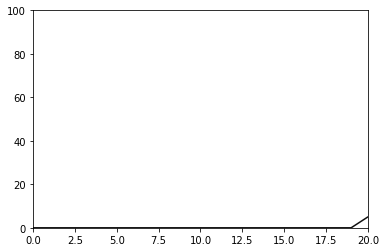

In [102]:
N = len(y)/2
plt.plot(x,y,color='#0f0f0f')
plt.axis([0, 20,0,100])

# 9 задание. Обработка данных из файла

In [103]:
import struct
    # чтение данных из файла
filename = "v1y3.dat"

f = open(filename, "rb")
data = f.read(4)

y_list = []
while data:
    temp_tuple = struct.unpack("<f", data)
    temp_value = temp_tuple[0]
    y_list.append(temp_value)
    data = f.read(4)
y = np.array(y_list)

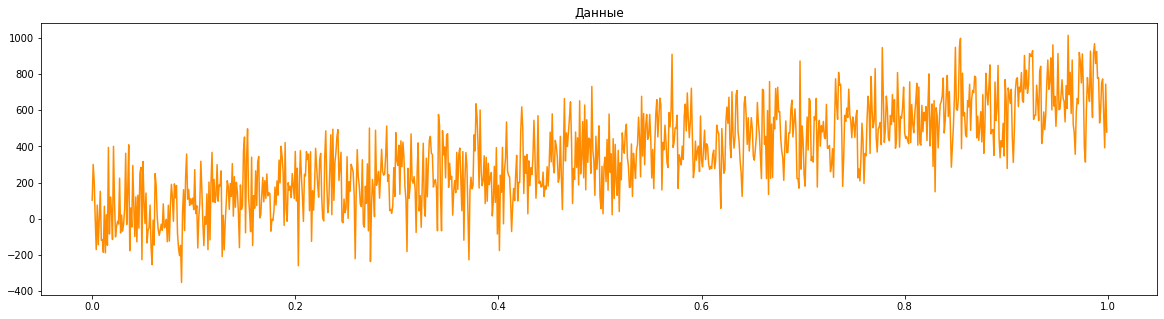

In [104]:
x = np.arange(0.0, 1,0.001)


plt.figure(figsize=(20, 5))
text = "Данные"
plt.title(text)
plt.plot(x, y,color='darkorange')
plt.show()

x,y = amplitude_furie(y)

Text(0.5, 1.0, 'Амплитудный спектр Фурье')

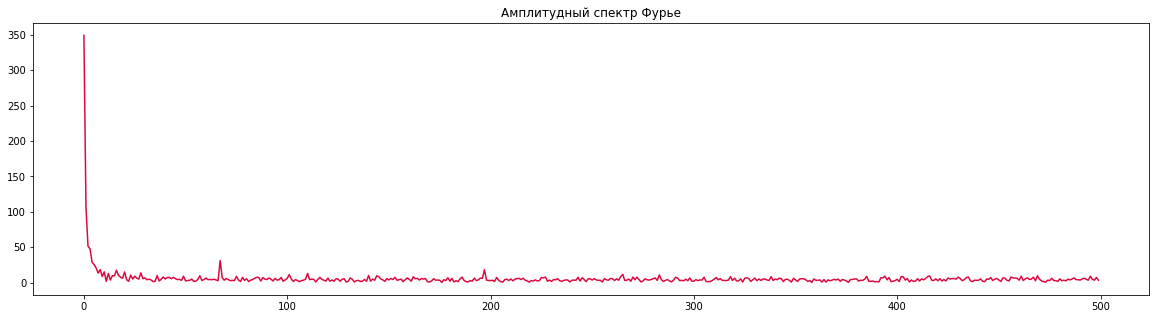

In [105]:
plt.figure(figsize=(20, 5))
plt.plot(y,color='#da0a3f')
text = "Амплитудный спектр Фурье"
plt.title(text)


#plt.axis([0,500,0,0.00025])
#гармоника 5 - амплитуда 10
#12:29 лекция

Text(0.5, 1.0, 'Амплитудный спектр Фурье на частотной шкале')

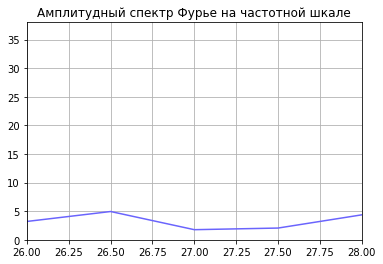

In [106]:
#plt.figure(figsize=(20, 5))
plt.plot(inherz(x),y,color='#6a64fd')
plt.grid()
plt.axis([26,28,0,38])
text = "Амплитудный спектр Фурье на частотной шкале"
plt.title(text)

In [107]:
class Function:
    def __init__(self, start=None, end=None, step=None):
        if start is not None and end is not None and step is not None:
            self.initializeX(start, end, step)
            self.initializeY()
    
    def initializeX(self, start, end, step):
        self.start = start
        self.end = end
        self.step = step
        self.length = int(np.ceil(np.abs(end - start) / step))
        self.X = np.arange(start, end, step)
    
    def initializeY(self):
        self.Y = np.zeros(self.length)
        
    def lin(self, a, b):
        self.Y = a * self.X + b
    
    def exp(self, a, b):
        self.Y = np.exp(-a * self.X) * b
       
    def rand(self, scale):
        self.Y = np.array([random.uniform(-scale, scale) for _ in range(0, self.length)])
        
    def my_rand(self, scale):
        a = 45;
        c = -21;
        m = 100;
        seed = 0.4546;
        l = []
        for i in range(0, self.length):
            seed = (a * seed + c) % m
            l.append(seed)
        self.Y = np.array([(((l[i] - min(l)) / (max(l) - min(l))) * 2 - 1) * scale for i in range(0, len(l))])
        
    def sin(self, A, f):
        self.Y = A * np.sin(2 * np.pi * f * self.X)
        
    def complex_sin(self, arrA, arrF):
        for i in range(0, len(A)):
            self.Y += arrA[i] * np.sin(2 * np.pi * arrF[i] * self.X)
        
    def complex_func(self, arrFunc):
        self.Y = 0
        for i in range(0, len(arrFunc)):
            self.Y += arrFunc[i].Y.copy()
            
    def multiply_func(self, arrFunc):
        self.Y = 1
        for i in range(0, len(arrFunc)):
            self.Y *= arrFunc[i].Y.copy()
        
    def trend(self, func):
        L = func.length - self.length
        for m in range(0, self.length):
            sum = 0
            for k in range(m, m + L):
                sum += func.Y[k]
            self.Y[m] = sum / L
    
    def anti_random(self, arrFuncs, scale, iterations):
        try:
            start = arrFuncs[0].start
            end = arrFuncs[0].end
            step = arrFuncs[0].step
        except:
            start = 0
            end = 1000
            step = 1
        funcRand = Function(start, end, step)
        funcComplex = Function(start, end, step)
        funcComplexArr = []
        for i in range(0, iterations):
            funcRand.rand(scale)
            funcComplex.complex_func(arrFuncs + [funcRand])
            funcComplex.Y = funcComplex.Y / iterations
            funcComplexArr.append(funcComplex.Y.copy())        
        self.Y = funcComplexArr[0]
        for i in range(1, len(funcComplexArr)):
            self.Y += funcComplexArr[i]
        
    def fourier_spectrum(self, func, window, freq=False, half=False, dt=1):
        lenZeros = int(func.length * (1 - window) / 2)
        for i in range(0, lenZeros):
            func.Y[i] = 0
            func.Y[N - i - 1] = 0
        sumRe, sumIm = 0, 0
        for k in range(0, func.length):
            sumRe += func.Y[k] * np.cos(2 * np.pi * self.X * k / func.length)
            sumIm += func.Y[k] * np.sin(2 * np.pi * self.X * k / func.length)
        Re = (1 / func.length) * sumRe
        Im = (1 / func.length) * sumIm
        self.Y = (Re ** 2 + Im ** 2) ** 0.5
        if freq:
            # переходим от параметра n к f
            df = 1 / (self.end * dt)
            self.initializeX(self.start, self.end * df, df)
        if half:
            # берём первую половину графика
            self.initializeX(self.start, int(self.end / 2), self.step)
            self.Y = np.array(list(self.Y)[:self.length])
        
    def file_func(self, path, mode, format, dt=1):
        file = open(path, mode)
        byte = file.read(4)
        data = []
        while byte:
            data.append(struct.unpack(format, byte)[0])
            byte = file.read(4)
        self.initializeX(0, len(data) * dt, dt)
        self.Y = np.array(data)
        
    def wave_func(self, file, attr):
#         rate, data = wav.read(name_of_wav_file)
#         self.y = np.array(data)
#         self.x = np.arange(len(data)) / float(rate)
#         self.rate = rate
        f = wave.open(file, attr)
        params = f.getparams()
        nchannels = params[0]
        sampwidth = params[1]
        framerate = params[2]
        nframes = params[3]
        self.initializeX(0, nframes / framerate, 1 / framerate)
        str_data  = f.readframes(nframes)  
        f.close()
        self.Y = np.frombuffer(str_data, dtype = np.int16)
        self.Y.shape = -1,2
        self.Y = self.Y.T[0]
        
    def amplify_wave(self, coef, funcWave, file, rate):
        data = coef * funcWave.Y.copy()
        f = wave.open(file, 'w')
        f.setnchannels(1)
        f.setsampwidth(2)
        f.setframerate(rate)
        for i in range(0, funcWave.length):
            value = struct.pack('<h', int(data[i]))
            f.writeframesraw(value)
        f.close()
        
    def cut_wave(self, funcWave):
        bottom = int(self.start * (1 / self.step))
        top = int(self.end * (1 / self.step))
        self.Y = funcWave.Y[bottom : top].copy()
                
    def convolution_func(self, x, h):
        N = x.length
        M = h.length
        self.Y = np.zeros(N + M) # меняем количесвто значений функции
        for k in range(0, N + M):
            sum = 0
            for j in range(0, M):
                try:
                    sum += x.Y[k - j] * h.Y[j]
                except:
                    sum += 0
            self.Y[k] = sum
        self.Y = np.array(list(self.Y)[: len(self.Y) - M]) # удаляем справа M значений
        
    def normalize(self):
        maxY = self.Y.max()
        for i in range(0, self.length):
            self.Y[i] = self.Y[i] / maxY
            
    def lpf(self, fc, dt, m):
        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        fact = float(2 * fc)
        lpw = []
        lpw.append(fact)
        arg = fact * np.pi
        for i in range(1, m + 1):
            lpw.append(np.sin(arg * i) / (np.pi * i))
        lpw[m] /= 2
        sumg = lpw[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2 * d[k] * np.cos(arg * k)
            lpw[i] *= sum
            sumg += 2 * lpw[i]
        for i in range(0, m + 1):
            lpw[i] /= sumg
        lpwRes = []
        for i in range(len(lpw) - 1, 0, -1):
            lpwRes.append(lpw[i])
        self.Y = np.array(lpwRes + lpw)
        
    def hpf(self, fc, dt, m):
        lpw = Function(0, 2 * m + 1, 1)
        lpw.lpf(fc, dt, m)
        loper = 2 * m + 1
        hpw = [0 for _ in range(0, loper)]
        for k in range(0, loper):
            if k == m:
                hpw[k] = 1 - lpw.Y[k]
            else:
                hpw[k] = -1 * lpw.Y[k]
        self.Y = np.array(hpw)
    
    def bpf(self, fc1, fc2, dt, m):
        lpw1 = Function(0, 2 * m + 1, 1)
        lpw1.lpf(fc1, dt, m)
        lpw2 = Function(0, 2 * m + 1, 1)
        lpw2.lpf(fc2, dt, m)
        loper = 2 * m + 1
        bpw = [0 for _ in range(0, loper)]
        for k in range(0, loper):
            bpw[k] = lpw2.Y[k] - lpw1.Y[k]
        self.Y = np.array(bpw)
        
    def bsf(self, fc1, fc2, dt, m):
        lpw1 = Function(0, 2 * m + 1, 1)
        lpw1.lpf(fc1, dt, m)
        lpw2 = Function(0, 2 * m + 1, 1)
        lpw2.lpf(fc2, dt, m)
        loper = 2 * m + 1
        bsw = [0 for _ in range(0, loper)]
        for k in range(0, loper):
            if k == m:
                bsw[k] = 1 + lpw1.Y[k] - lpw2.Y[k]
            else:
                bsw[k] = lpw1.Y[k] - lpw2.Y[k]
        self.Y = np.array(bsw)

    def display(self, title, xlabel='x', ylabel='y',color='r'):
        plt.plot(self.X, self.Y, color = 'black')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(False)
class Metric:
    @staticmethod
    def std_dev(func):
        return np.var(func) ** (0.5)

    @staticmethod
    def mid_sqr(func):
        sum = 0
        for val in func:
            sum += val ** 2
        return sum / len(func)

    @staticmethod
    def mid_sqr_dev(func):
        sum = 0
        for val in func:
            sum += val ** 2
        return (sum / len(func)) ** (0.5)

    @staticmethod
    def asym(func):
        sum = 0
        for val in func:
            sum += (val - np.mean(func)) ** 3
        return  sum / len(func)

    @staticmethod
    def exc(func):
        sum = 0
        for val in func:
            sum += (val - np.mean(func)) ** 4
        return sum / len(func)

    @staticmethod
    def aC(func):
        return Metric.asym(func) / (Metric.std_dev(func) ** 3)

    @staticmethod
    def eC(func):
        return (Metric.exc(func) / (Metric.std_dev(func) ** 4)) - 3

    @staticmethod
    def split_list(alist, wanted_parts=1):
        length = len(alist)
        return [ alist[i * length // wanted_parts: (i + 1) * length // wanted_parts] for i in range(wanted_parts) ]

    @staticmethod
    def split(func, M, devotion=10):
        split_func = Metric.split_list(func, wanted_parts=M)
        mean, disp = [], []
        for part in split_func:
            mean.append(np.mean(part))
            disp.append(np.var(part))
        check = True
        for i in range(0, len(mean)):
            if abs(((np.mean(func) - mean[i]) / np.mean(func)) * 100) > devotion or \
               abs(((np.var(func) - disp[i]) / np.var(func)) * 100) > devotion:
                check = False
                break
        return {'Means': mean, 'Dispersions': disp, 'Check': check}  
class Correlation:
    @staticmethod
    def Rxx(func):
        N = len(func)
        meanF = np.mean(func)
        corr = []
        for l in range(0, N):
            sum1 = 0
            sum2 = 0
            for k in range(0, N - l):
                sum1 += (func[k] - meanF) * (func[k + l] - meanF)
            for k in range(0, N):
                sum2 += (func[k] - meanF) * (func[k] - meanF)
            corr.append(sum1 / sum2)
        return corr

    @staticmethod
    def RxxMean(func):
        N = len(func)
        meanF = np.mean(func)
        corr = []
        for l in range(0, N):
            sum = 0
            for k in range(0, N - l):
                sum += (func[k] - meanF) * (func[k + l] - meanF)
            corr.append(sum / N)
        return corr

    @staticmethod
    def Rxy(func1, func2):
        N = len(func1)
        meanF1 = np.mean(func1)
        meanF2 = np.mean(func2)
        corr = []
        for l in range(0, N):
            sum = 0
            for k in range(0, N - l):
                sum += (func1[k] - meanF1) * (func2[k + l] - meanF2)
            corr.append(sum / N)
        return corr

# 10 задание

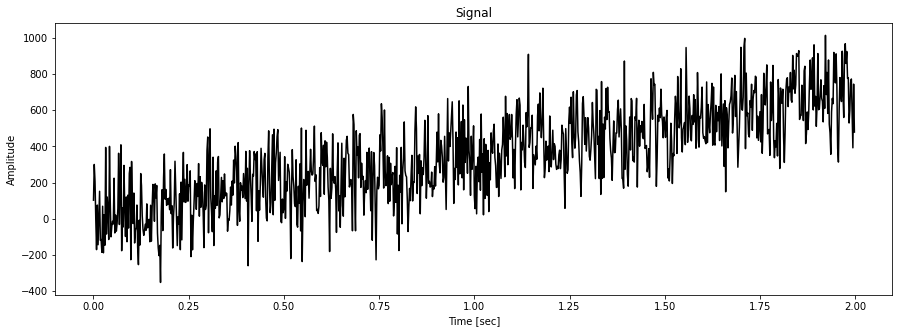

In [108]:
dt = 0.002 # приращение по времени (шаг дискретизации)

# Читаем файл, строим график данных
funcFile = Function()
funcFile.file_func('v1y3.dat', 'rb', '<f', dt)
plt.figure(figsize=(15, 5))
funcFile.display('Signal', 'Time [sec]', 'Amplitude')


In [109]:
class Function:
    def __init__(self, start=None, end=None, step=None):
        if start is not None and end is not None and step is not None:
            self.initializeX(start, end, step)
            self.initializeY()
    
    def initializeX(self, start, end, step):
        self.start = start
        self.end = end
        self.step = step
        self.length = int(np.ceil(np.abs(end - start) / step))
        self.X = np.arange(start, end, step)
    
    def initializeY(self):
        self.Y = np.zeros(self.length)
        
    def lin(self, a, b):
        self.Y = a * self.X + b
    
    def exp(self, a, b):
        self.Y = np.exp(-a * self.X) * b
       
    def rand(self, scale):
        self.Y = np.array([random.uniform(-scale, scale) for _ in range(0, self.length)])
        
    def sin(self, A, f):
        self.Y = A * np.sin(2 * np.pi * f * self.X)
        
    def complex_sin(self, arrA, arrF):
        for i in range(0, len(A)):
            self.Y += arrA[i] * np.sin(2 * np.pi * arrF[i] * self.X)
        
    def complex_func(self, arrFunc):
        self.Y = 0
        for i in range(0, len(arrFunc)):
            self.Y += arrFunc[i].Y.copy()
            
    def multiply_func(self, arrFunc):
        self.Y = 1
        for i in range(0, len(arrFunc)):
            self.Y *= arrFunc[i].Y.copy()
        
    def trend(self, func):
        L = func.length - self.length
        for m in range(0, self.length):
            sum = 0
            for k in range(m, m + L):
                sum += func.Y[k]
            self.Y[m] = sum / L
    
    def anti_random(self, arrFuncs, scale, iterations):
        try:
            start = arrFuncs[0].start
            end = arrFuncs[0].end
            step = arrFuncs[0].step
        except:
            start = 0
            end = 1000
            step = 1
        funcRand = Function(start, end, step)
        funcComplex = Function(start, end, step)
        funcComplexArr = []
        for i in range(0, iterations):
            funcRand.rand(scale)
            funcComplex.complex_func(arrFuncs + [funcRand])
            funcComplex.Y = funcComplex.Y / iterations
            funcComplexArr.append(funcComplex.Y.copy())        
        self.Y = funcComplexArr[0]
        for i in range(1, len(funcComplexArr)):
            self.Y += funcComplexArr[i]
        
    def fourier_spectrum(self, func, window, freq=False, half=False, dt=1):
        lenZeros = int(func.length * (1 - window) / 2)
        for i in range(0, lenZeros):
            func.Y[i] = 0
            func.Y[N - i - 1] = 0
        sumRe, sumIm = 0, 0
        for k in range(0, func.length):
            sumRe += func.Y[k] * np.cos(2 * np.pi * self.X * k / func.length)
            sumIm += func.Y[k] * np.sin(2 * np.pi * self.X * k / func.length)
        Re = (1 / func.length) * sumRe
        Im = (1 / func.length) * sumIm
        self.Y = (Re ** 2 + Im ** 2) ** 0.5
        if freq:
            # переходим от параметра n к f
            df = 1 / (self.end * dt)
            self.initializeX(self.start, self.end * df, df)
        if half:
            # берём первую половину графика
            self.initializeX(self.start, int(self.end / 2), self.step)
            self.Y = np.array(list(self.Y)[:self.length])
        
    def file_func(self, path, mode, format, dt=1):
        file = open(path, mode)
        byte = file.read(4)
        data = []
        while byte:
            data.append(struct.unpack(format, byte)[0])
            byte = file.read(4)
        self.initializeX(0, len(data) * dt, dt)
        self.Y = np.array(data)
        
    def convolution_func(self, x, h):
        N = x.length
        M = h.length
        self.Y = np.zeros(N + M) # меняем количесвто значений функции
        for k in range(0, N + M):
            sum = 0
            for j in range(0, M):
                try:
                    sum += x.Y[k - j] * h.Y[j]
                except:
                    sum += 0
            self.Y[k] = sum
        self.Y = np.array(list(self.Y)[: len(self.Y) - M]) # удаляем справа M значений
        
    def normalize(self):
        maxY = self.Y.max()
        for i in range(0, self.length):
            self.Y[i] = self.Y[i] / maxY
            
    def lpf(self, fc, dt, m):
        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        fact = float(2 * fc)
        lpw = []
        lpw.append(fact)
        arg = fact * np.pi
        for i in range(1, m + 1):
            lpw.append(np.sin(arg * i) / (np.pi * i))
        lpw[m] /= 2
        sumg = lpw[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2 * d[k] * np.cos(arg * k)
            lpw[i] *= sum
            sumg += 2 * lpw[i]
        for i in range(0, m + 1):
            lpw[i] /= sumg
        lpwRes = []
        for i in range(len(lpw) - 1, 0, -1):
            lpwRes.append(lpw[i])
        self.Y = np.array(lpwRes + lpw)
        
    def hpf(self, fc, dt, m):
        lpw = Function(0, 2 * m + 1, 1)
        lpw.lpf(fc, dt, m)
        loper = 2 * m + 1
        hpw = [0 for _ in range(0, loper)]
        for k in range(0, loper):
            if k == m:
                hpw[k] = 1 - lpw.Y[k]
            else:
                hpw[k] = -1 * lpw.Y[k]
        self.Y = np.array(hpw)
    
    def bpf(self, fc1, fc2, dt, m):
        lpw1 = Function(0, 2 * m + 1, 1)
        lpw1.lpf(fc1, dt, m)
        lpw2 = Function(0, 2 * m + 1, 1)
        lpw2.lpf(fc2, dt, m)
        loper = 2 * m + 1
        bpw = [0 for _ in range(0, loper)]
        for k in range(0, loper):
            bpw[k] = lpw2.Y[k] - lpw1.Y[k]
        self.Y = np.array(bpw)
        
    def bsf(self, fc1, fc2, dt, m):
        lpw1 = Function(0, 2 * m + 1, 1)
        lpw1.lpf(fc1, dt, m)
        lpw2 = Function(0, 2 * m + 1, 1)
        lpw2.lpf(fc2, dt, m)
        loper = 2 * m + 1
        bsw = [0 for _ in range(0, loper)]
        for k in range(0, loper):
            if k == m:
                bsw[k] = 1 + lpw1.Y[k] - lpw2.Y[k]
            else:
                bsw[k] = lpw1.Y[k] - lpw2.Y[k]
        self.Y = np.array(bsw)

    def display(self, title, xlabel='x', ylabel='y'):
        plt.plot(self.X, self.Y,color='#11b0a0')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(False)

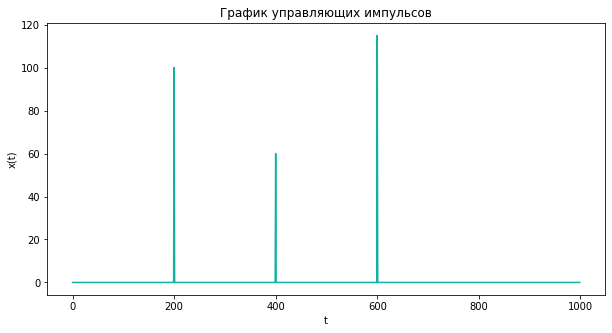

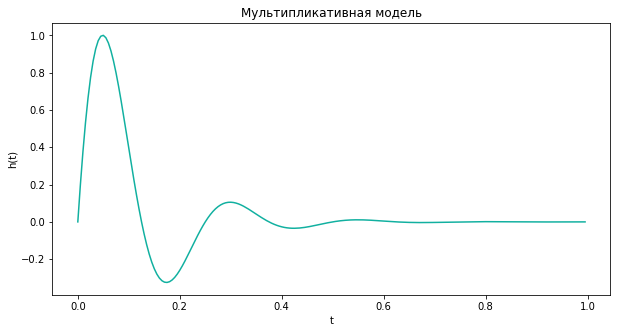

In [110]:
N = 1000 # количество значений в входном сигнале
M = 200 # количество значений в функции h
start = 0 # начальное значение
step = 1 # шаг по умолчанию
dt = 0.005 # шаг дискретизации

A = 10 # амплитуда гармонического процесса
f = 4 # частота
# параметры экспоненты
a = 9
b = 1

# Входной сигнал
x = Function(start, N, step)
x.Y[200] = 100
x.Y[400] = 60
x.Y[600] = 115
plt.figure(figsize=(10, 5))
x.display('График управляющих импульсов', 't', 'x(t)')


# Мультипликативная функция h
funcExp = Function(start, M * dt, dt)
funcExp.exp(a, b)
funcSin = Function(start, M * dt, dt)
funcSin.sin(A, f)
h = Function(start, M * dt, dt)
h.multiply_func([funcExp, funcSin])
h.normalize()
plt.figure(figsize=(10, 5))
h.display('Мультипликативная модель', 't', 'h(t)')



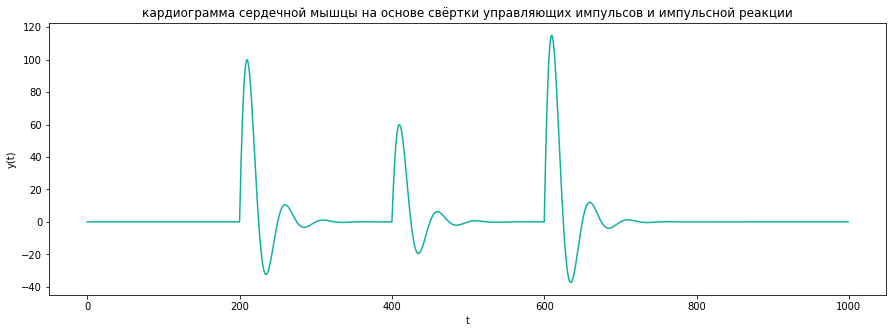

In [111]:
# Функция свёртки
funcConv = Function(start, N, step)
funcConv.convolution_func(x, h)
plt.figure(figsize=(15, 5))
funcConv.display('кардиограмма сердечной мышцы на основе свёртки управляющих импульсов и импульсной реакции', 't', 'y(t)')

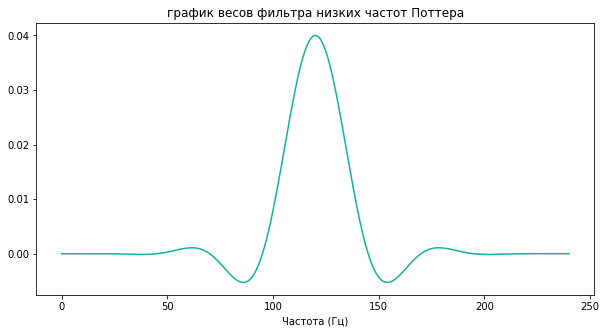

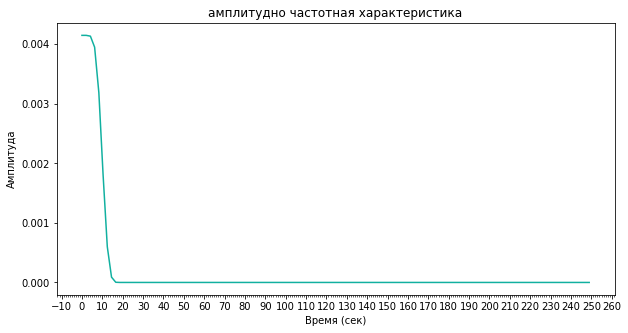

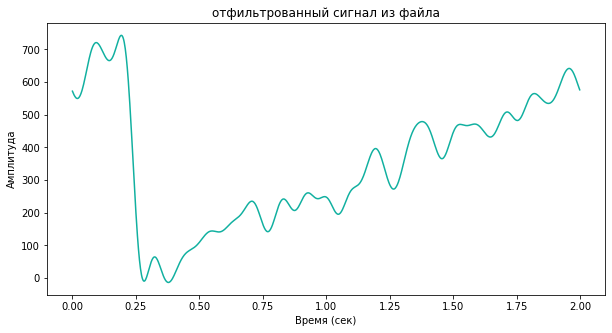

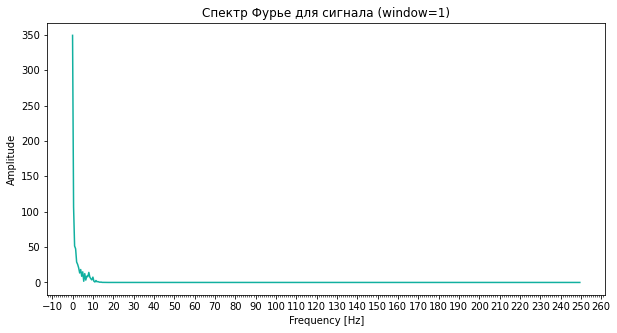

In [112]:
start = 0
N = 1000
step = 1
m = 120
dt = 0.002

lpw = Function(start, 2 * m + 1, step)
lpw.lpf(10 * dt, dt, m)
plt.figure(figsize=(10, 5))
lpw.display('график весов фильтра низких частот Поттера', 'Частота (Гц)', '')

funcFourier = Function(start, 2 * m + 1, step)
funcFourier.fourier_spectrum(lpw, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(10)
fig.set_figheight(5)
funcFourier.display('амплитудно частотная характеристика', 'Время (сек)', 'Амплитуда')

# LPF фильтр
funcConv = Function(start, N * dt, dt)
funcConv.convolution_func(funcFile, lpw)
plt.figure(figsize=(10, 5))
funcConv.display('отфильтрованный сигнал из файла', 'Время (сек)', 'Амплитуда')

funcFourier = Function(start, N, step)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(10)
fig.set_figheight(5)
funcFourier.display('Спектр Фурье для сигнала (window=1)', 'Frequency [Hz]', 'Amplitude')

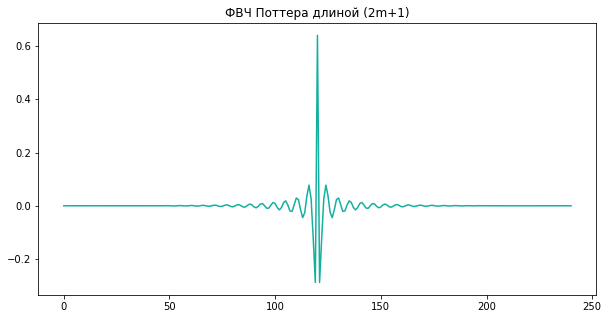

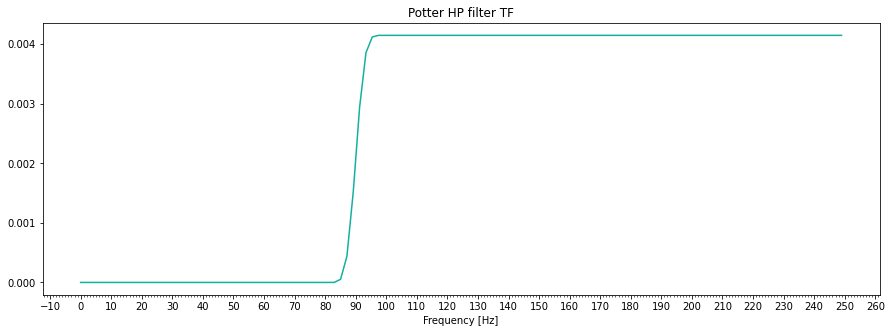

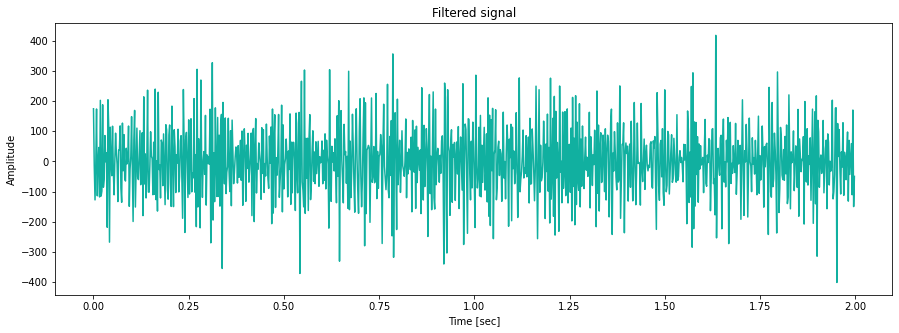

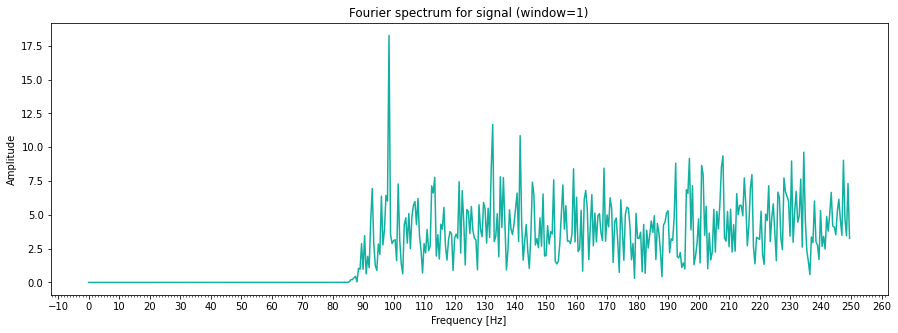

In [113]:
hpw = Function(start, 2 * m + 1, step)
hpw.hpf(90 * dt, dt, m)
plt.figure(figsize=(10, 5))
hpw.display('ФВЧ Поттера длиной (2m+1)', '', '')

funcFourier = Function(start, 2 * m + 1, step)
funcFourier.fourier_spectrum(hpw, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(5)
funcFourier.display('Potter HP filter TF', 'Frequency [Hz]', '')

# HPF фильтр
funcConv = Function(start, N * dt, dt)
funcConv.convolution_func(funcFile, hpw)
plt.figure(figsize=(15, 5))
funcConv.display('Filtered signal', 'Time [sec]', 'Amplitude')

funcFourier = Function(start, N, step)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(5)
funcFourier.display('Fourier spectrum for signal (window=1)', 'Frequency [Hz]', 'Amplitude')

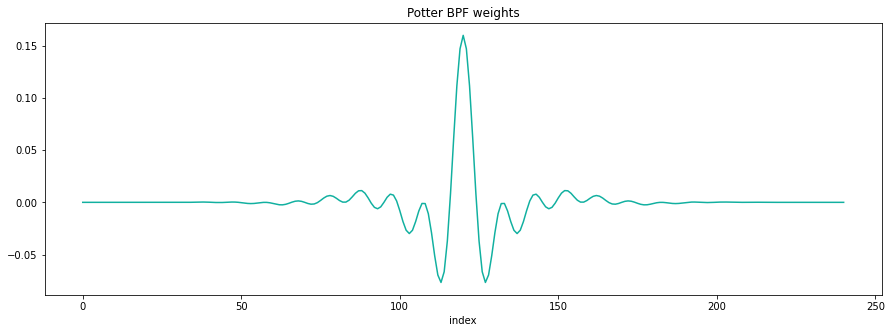

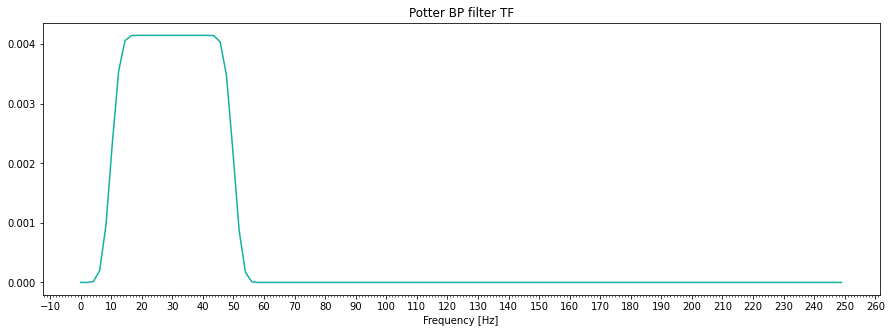

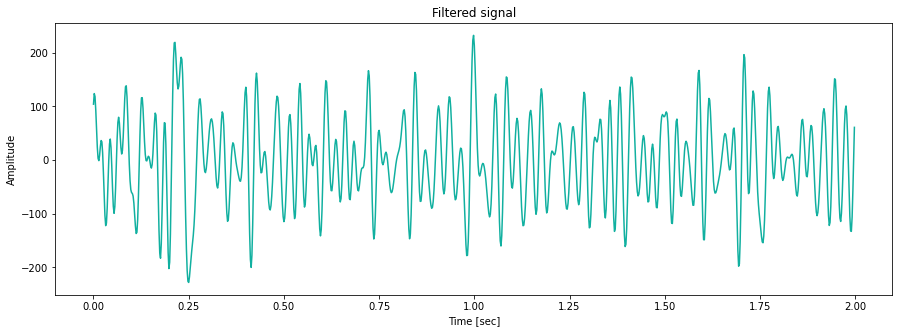

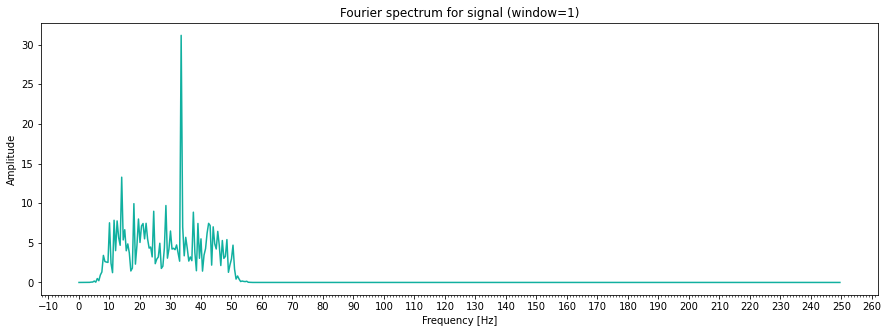

In [114]:
bpw = Function(start, 2 * m + 1, step)
bpw.bpf(10 * dt, 50 * dt, dt, m)
plt.figure(figsize=(15, 5))
bpw.display('Potter BPF weights', 'index', '')

funcFourier = Function(start, 2 * m + 1, step)
funcFourier.fourier_spectrum(bpw, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(5)
funcFourier.display('Potter BP filter TF', 'Frequency [Hz]', '')

# BPF фильтр
funcConv = Function(start, N * dt, dt)
funcConv.convolution_func(funcFile, bpw)
plt.figure(figsize=(15, 5))
funcConv.display('Filtered signal', 'Time [sec]', 'Amplitude')

funcFourier = Function(start, N, step)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(5)
funcFourier.display('Fourier spectrum for signal (window=1)', 'Frequency [Hz]', 'Amplitude')


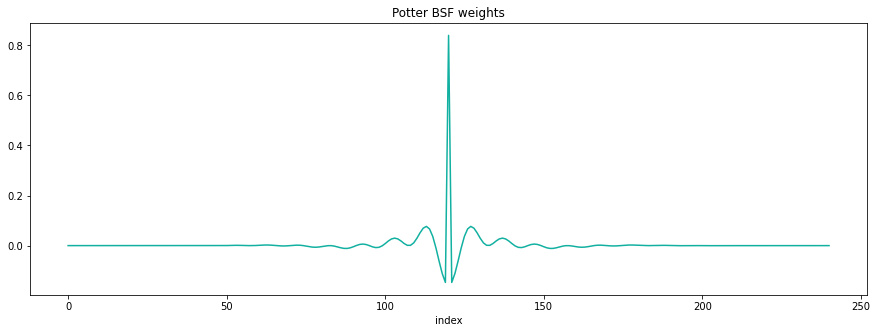

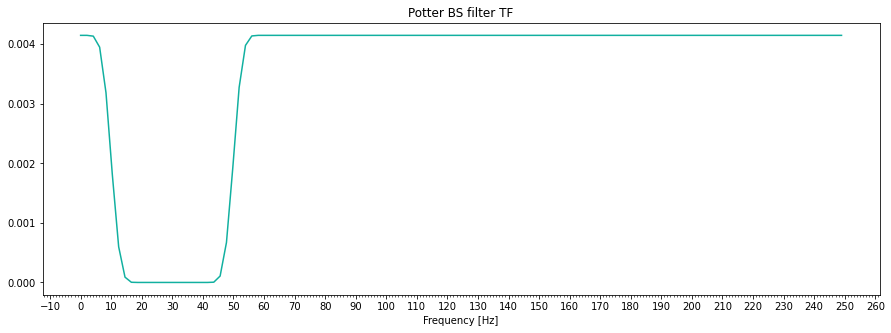

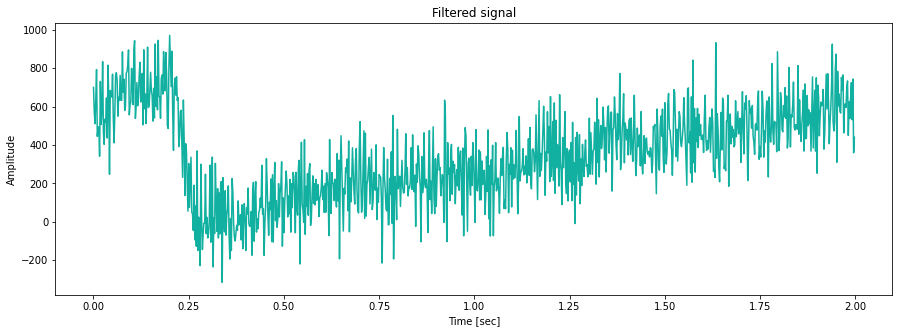

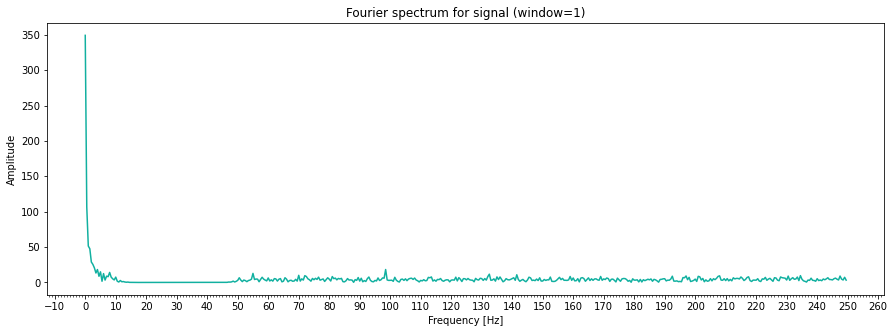

In [115]:
bsw = Function(start, 2 * m + 1, step)
bsw.bsf(10 * dt, 50 * dt, dt, m)
plt.figure(figsize=(15, 5))
bsw.display('Potter BSF weights', 'index', '')

funcFourier = Function(start, 2 * m + 1, step)
funcFourier.fourier_spectrum(bsw, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(5)
funcFourier.display('Potter BS filter TF', 'Frequency [Hz]', '')

# BSF фильтр
funcConv = Function(start, N * dt, dt)
funcConv.convolution_func(funcFile, bsw)
plt.figure(figsize=(15, 5))
funcConv.display('Filtered signal', 'Time [sec]', 'Amplitude')

funcFourier = Function(start, N, step)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
fig.set_figwidth(15)
fig.set_figheight(5)
funcFourier.display('Fourier spectrum for signal (window=1)', 'Frequency [Hz]', 'Amplitude')


# 11 задание
## Класс для чтения данных из файла

In [116]:
import numpy as np
import scipy.io.wavfile as wav
import math as m


class Sound:
    def __init__(self, name_of_wav_file):
        rate, data = wav.read(name_of_wav_file)
        self.y = np.array(data)
        self.x = np.arange(len(data)) / float(rate)
        self.rate = rate


In [117]:
name_of_wav_file = "myvoice.wav"
sound_trend = Sound(name_of_wav_file)

# Гармоничекое процесс
c = 1  # Константа

x = sound_trend.x
y = sound_trend.y * c
rate = sound_trend.rate

n = len(x)
flag_checking_display_n = 1

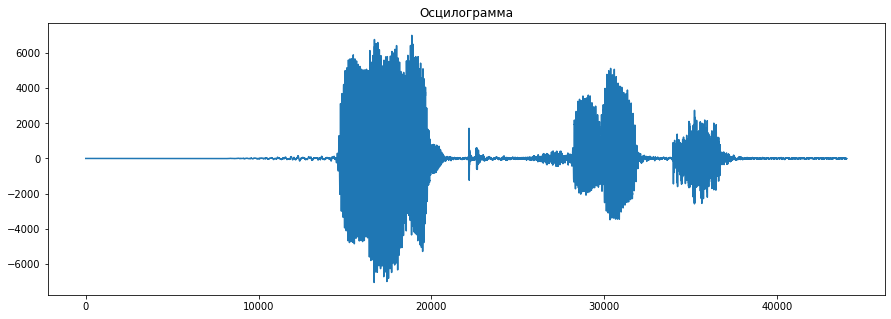

In [118]:
plt.figure(figsize=(15, 5))
plt.title("Осцилограмма")
plt.plot(y)

## Выделение части данных (слога) для обработки 

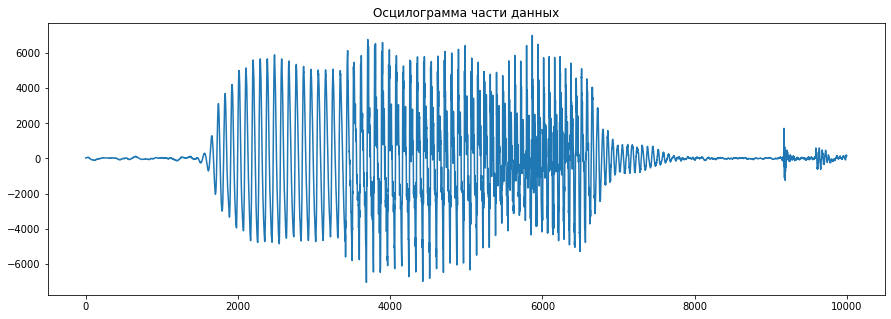

In [119]:
plt.figure(figsize=(15, 5))
plt.plot(y[13000:23000])
plt.title("Осцилограмма части данных")
plt.show()

## Обработка части данных и построение графика

In [120]:
y = y[13000:23000]
print(len(y))
funcFourier = amplitude_furie(y)

10000


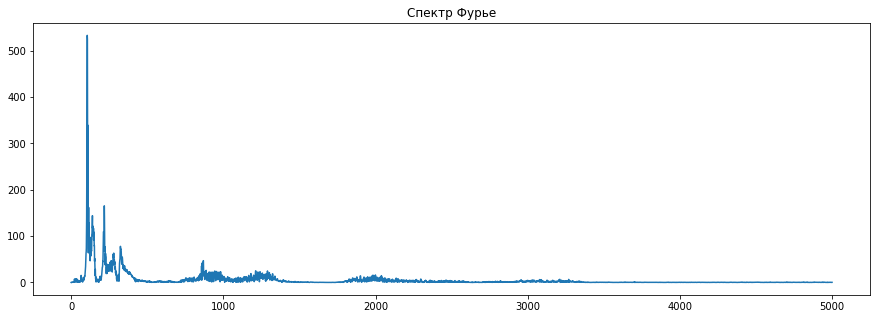

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(funcFourier[0],funcFourier[1])
plt.title("Спектр Фурье")
plt.show()

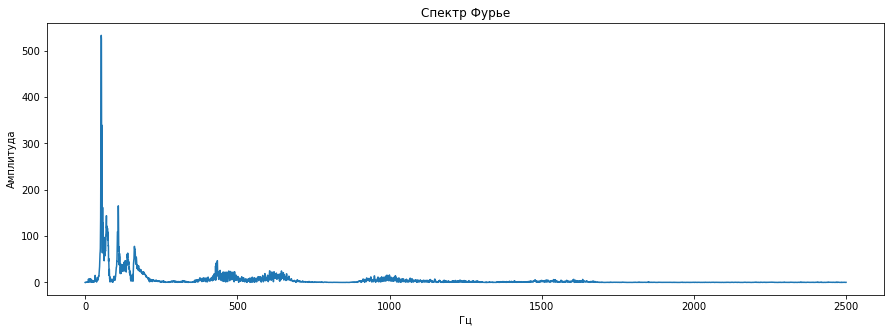

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(inherz(funcFourier[0]),funcFourier[1])
plt.xlabel('Гц')
plt.ylabel('Амплитуда')
plt.title("Спектр Фурье")
plt.show()

## Умноженные данные на константу

In [53]:
sound_trend = Sound(name_of_wav_file)
funcFile = Function()
funcFile.file_func('pgp_float4_1000_2ms.dat', 'rb', '<f', dt)

# Гармоничекое процесс
c = -13  # Константа

x = sound_trend.x
y = sound_trend.y * c
rate = sound_trend.rate

n = len(x)
flag_checking_display_n = 1


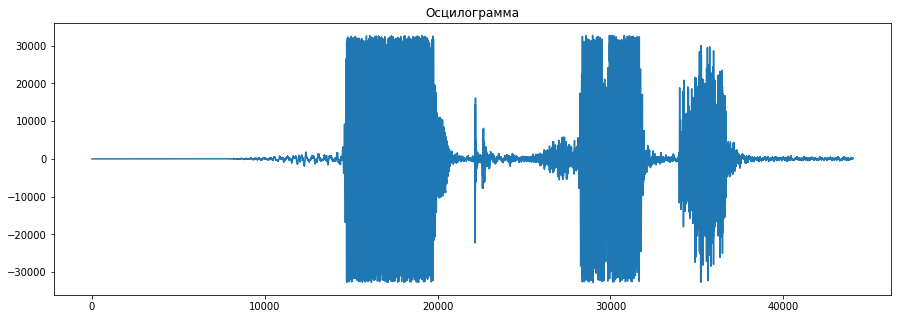

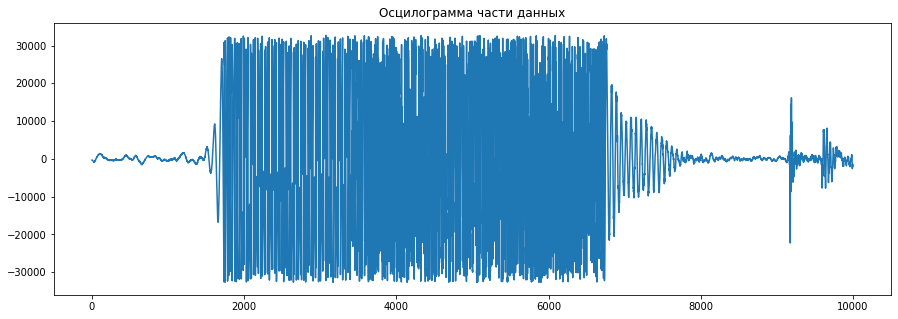

10000


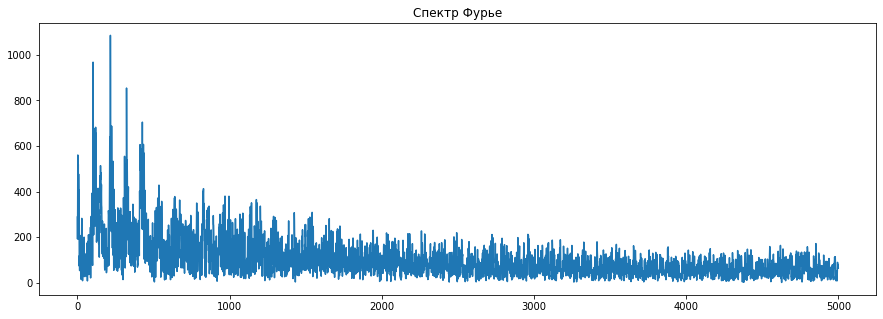

In [54]:
plt.figure(figsize=(15, 5))
plt.title("Осцилограмма")
plt.plot(y)
plt.figure(figsize=(15, 5))
plt.plot(y[13000:23000])
plt.title("Осцилограмма части данных")
plt.show()
y = y[13000:23000]
print(len(y))
funcFourier = amplitude_furie(y)
plt.figure(figsize=(15, 5))
plt.plot(funcFourier[0],funcFourier[1])
plt.title("Спектр Фурье")
plt.show()
from scipy.io.wavfile import write
write("newVoice.wav", 22050, y.astype(np.int16))

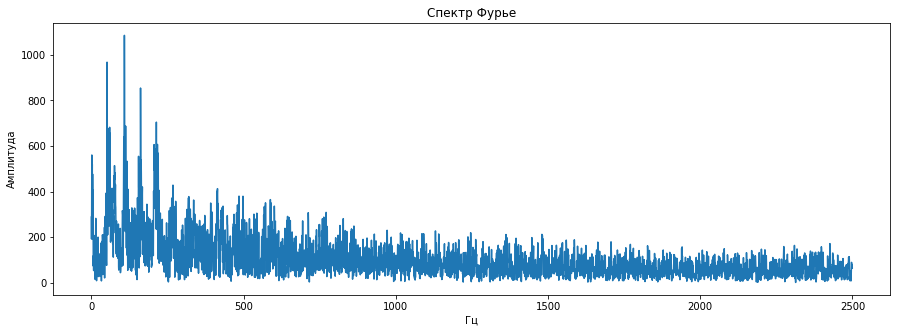

In [55]:
plt.figure(figsize=(15, 5))
plt.plot(inherz(funcFourier[0]),funcFourier[1])
plt.xlabel('Гц')
plt.ylabel('Амплитуда')
plt.title("Спектр Фурье")
plt.show()

In [56]:
def inherz(data):
    x1=[]
    for i in range(len(data)):
        x1.append(i/2) #шкала для герц
    return x1

# 11 задание 

Выделение формант

In [57]:
name_of_wav_file = "myvoice.wav"
sound_trend = Sound(name_of_wav_file)

# Гармоничекое процесс
c = 1  # Константа

x = sound_trend.x
y = sound_trend.y * c
rate = sound_trend.rate

n = len(x)
flag_checking_display_n = 1

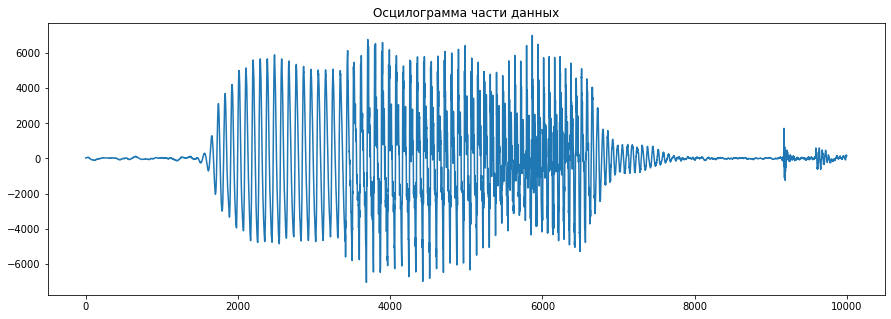

In [58]:
plt.figure(figsize=(15, 5))
plt.plot(y[13000:23000])
plt.title("Осцилограмма части данных")
plt.show()

In [59]:
def convolution(trend_1, trend_2):
    trend = Trend()

    n = len(trend_1.y)
    m = len(trend_2.y)

    y = []
    for i in range(n):
        y_k = 0
        for j in range(m):
            coefficient_x = i - j
            if coefficient_x >= 0:
                y_m = trend_1.y[coefficient_x] * trend_2.y[j]
            else:
                # y_m = trend_2.y[j]
                y_m = 0
            y_k += y_m

        y.append(y_k)

    trend.y = np.array(y)
    trend.x = trend_1.x

    return trend


def filter_potter(m, dt, fc):
    # прямоугольник
    arg = 2 * dt * fc
    lpw = [arg]
    arg *= math.pi

    for i in range(1, m + 1):
        append_value = (math.sin(arg * i)) / (math.pi * i)
        lpw.append(append_value)

    # трапеция
    lpw[m] /= 2

    # Сглаживающие окно Поттера P310
    d = [0.35577019, 0.24369830, 0.07211497, 0.00630165]

    sum_g = lpw[0]

    for i in range(1, m + 1):
        summ = d[0]
        arg = (math.pi * i) / m
        for k in range(1, 4):
            summ += 2 * d[k] * math.cos(arg * k)
        lpw[i] *= summ
        sum_g += 2 * lpw[i]

    # нормализация
    for i in range(m + 1):
        lpw[i] /= sum_g

    lpw_2 = lpw.copy()
    lpw_2.reverse()

    for i in range(1, len(lpw)):
        lpw_2.append(lpw[i])

    lpw = np.array(lpw_2)

    return lpw

In [60]:
np.array(y)

array([ 0,  0,  0, ..., -3, -7, -7], dtype=int16)

In [61]:
Function()

In [62]:
# Осцилограмма буквы И
funcLetter = Function()
funcLetter.wave_func('буква И.wav', 'rb')
plt.figure(figsize=(20, 5))
funcLetter.display('Letter \'И\'', 'Time [sec]', 'Amplitude')

# Спектр Фурье для буквы И
funcFourier = Function(0, funcLetter.length, 1)
funcFourier.fourier_spectrum(funcLetter, 1, True, True, dt)
plt.figure(figsize=(15, 5))
funcFourier.display('Fourier spectrum for letter \'И\'', 'Frequency [Hz]', 'Amplitude')
plt.xlim(0, 1000)

TypeError: unsupported operand type(s) for *: 'int' and 'module'

In [ ]:
start = 0
step = 1
m = 128

# Веса для LPF фильтра
lpw = Function(start, 2 * m + 1, step)
lpw.lpf(200 * dt, dt, m) # граница 250 Гц

# Выделение основного тона в букве И
funcConv = Function(start, funcLetter.length * dt, dt)
funcConv.convolution_func(funcLetter, lpw)
plt.figure(figsize=(20, 5))
funcConv.display('Main tone in letter \'И\'', 'Time [sec]', 'Amplitude')

# Спектр Фурье для основного тона буквы И
funcFourier = Function(0, funcConv.length, 1)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
plt.figure(figsize=(15, 5))
funcFourier.display('Fourier spectrum for main tone of letter \'И\'', 'Frequency [Hz]', 'Amplitude')
plt.xlim(0, 2000)

# Запись основного тона буквы И в файл
funcConv.amplify_wave(1, funcConv, 'основной тон буквы И.wav', 22050) # без усиления

In [ ]:
start = 0
step = 1
m = 256

# Веса для BPW фильтра
bpw = Function(start, 2 * m + 1, step)
bpw.bpf(300 * dt, 400 * dt, dt, m)

# Выделение первой форманты в букве И
funcConv = Function(start, funcLetter.length * dt, dt)
funcConv.convolution_func(funcLetter, bpw)
plt.figure(figsize=(20, 5))
funcConv.display('1 formant in letter \'И\'', 'Time [sec]', 'Amplitude')

# Спектр Фурье для первой форманты буквы И
funcFourier = Function(0, funcConv.length, 1)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
plt.figure(figsize=(15, 5))
funcFourier.display('Fourier spectrum for 1 formant of letter \'И\'', 'Frequency [Hz]', 'Amplitude')
plt.xlim(0, 2000)

# Запись первой форманты буквы И в файл
funcConv.amplify_wave(2, funcConv, '1 форманта буквы И.wav', 22050) # усиление в 2 раза


In [ ]:
start = 0
step = 1
m = 128

# Веса для BPW фильтра
bpw = Function(start, 2 * m + 1, step)
bpw.bpf(450 * dt, 600 * dt, dt, m)

# Выделение второй форманты в букве И
funcConv = Function(start, funcLetter.length * dt, dt)
funcConv.convolution_func(funcLetter, bpw)
plt.figure(figsize=(20, 5))
funcConv.display('2 formant in letter \'И\'', 'Time [sec]', 'Amplitude')

# Спектр Фурье для второй форманты буквы И
funcFourier = Function(0, funcConv.length, 1)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
plt.figure(figsize=(15, 5))
funcFourier.display('Fourier spectrum for 2 formant of letter \'И\'', 'Frequency [Hz]', 'Amplitude')
plt.xlim(0, 2000)

# Запись второй форманты буквы И в файл
funcConv.amplify_wave(3, funcConv, '2 форманта буквы И.wav', 22050) # усиление в 3 раза

In [ ]:
start = 0
step = 1
m = 128

# Веса для BPW фильтра
bpw = Function(start, 2 * m + 1, step)
bpw.bpf(650 * dt, 750 * dt, dt, m)

# Выделение третьей форманты в букве И
funcConv = Function(start, funcLetter.length * dt, dt)
funcConv.convolution_func(funcLetter, bpw)
plt.figure(figsize=(20, 5))
funcConv.display('3 formant in letter \'И\'', 'Time [sec]', 'Amplitude')

# Спектр Фурье для третьей форманты буквы И
funcFourier = Function(0, funcConv.length, 1)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
plt.figure(figsize=(15, 5))
funcFourier.display('Fourier spectrum for 3 formant of letter \'И\'', 'Frequency [Hz]', 'Amplitude')
plt.xlim(0, 2000)

# Запись третьей форманты буквы И в файл
funcConv.amplify_wave(17, funcConv, '3 форманта буквы И.wav', 22050) # усиление в 17 раз

In [ ]:
start = 0
step = 1
m = 128

# Веса для BPW фильтра
bpw = Function(start, 2 * m + 1, step)
bpw.bpf(800 * dt, 900 * dt, dt, m)

# Выделение четвёртой форманты в букве И
funcConv = Function(start, funcLetter.length * dt, dt)
funcConv.convolution_func(funcLetter, bpw)
plt.figure(figsize=(20, 5))
funcConv.display('4 formant in letter \'И\'', 'Time [sec]', 'Amplitude')

# Спектр Фурье для четвёртой форманты буквы И
funcFourier = Function(0, funcConv.length, 1)
funcFourier.fourier_spectrum(funcConv, 1, True, True, dt)
plt.figure(figsize=(15, 5))
funcFourier.display('Fourier spectrum for 4 formant of letter \'И\'', 'Frequency [Hz]', 'Amplitude')
plt.xlim(0, 2000)

# Запись четвёртой форманты буквы И в файл
funcConv.amplify_wave(32, funcConv, '4 форманта буквы И.wav', 22050) # усиление в 32 раза